In [ ]:
# módulos estándar
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn

# config Matplotlib
%matplotlib inline
plt.style.use('ggplot')

# config Seaborn
sns.set_theme(color_codes=True)
sns.set_style("darkgrid") # whitegrid

#Instalar Geopandas
!pip install geopandas
import geopandas as gpd

#Actualiza Sistemas y Instalar Qgis y plugins
!apt-get update
!apt-get install qgis python3-qgis qgis-plugin-grass

#Configurar variable del entorno
import os
os.environ['QGIS_PREFIX_PATH'] = '/usr'

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-qgis is already the newest version (3.22.7+dfsg-1~jammy1).
qgis is already the newest version (3.22.7+dfsg-1~jammy1).
qgis-plugin-

In [ ]:
#Dar permisos para acceso a archivos en drive
#Es necesario para obtener el archivo gpkg
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Insertar DataSets


In [ ]:
# Cargar usando Files de Google
from google.colab import files
uploaded = files.upload()

In [ ]:
ls

sample_data/


In [ ]:
#Definimos las columnas y leimos el dataset 1
colnames = ['año','dia','mes','clasificaciones_delito','conducta','armas_medios','barrios_hecho','nom_comuna','zona','latitud','longitud']
df1 = pd.read_csv('delitosClean.csv', header=None,names=colnames, low_memory=False)

In [ ]:
#Definimos las columnas y leimos el dataset 2
colnames = ['año','dia','mes','Festividad']
df2 = pd.read_csv('Calendario Historico.csv', header=None,names=colnames, low_memory=False)

In [ ]:
df1

,año,dia,mes,clasificaciones_delito,conducta,armas_medios,barrios_hecho,nom_comuna,zona,latitud,longitud
NaN,año,dia,mes,clasificaciones_delito,conducta,armas_medios,barrios_hecho,nom_comuna,zona,latitud,longitud
1.0,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,14. Morrorico,URBANA,7.170557382,-73.135108
2.0,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,05. García Rovira,URBANA,7.120645358,-73.12605
3.0,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,05. García Rovira,URBANA,7.120645358,-73.12605
4.0,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,03. San Francisco,URBANA,7.15135927,-73.145704583
...,...,...,...,...,...,...,...,...,...,...,...
132906.0,2021,30,Septiembre,Lesiones no fatales,HURTO A PERSONAS,SIN EMPLEO DE ARMAS,SAN FRANCISCO,03. San Francisco,URBANA,7.1303582541,-73.1200402943
132907.0,2021,30,Septiembre,Lesiones no fatales,LESIONES PERSONALES,ARMA TRAUMATICA,COLORADOS,01. Norte,URBANA,7.1788382999,-73.1319039293
132908.0,2021,30,Septiembre,Lesiones no fatales,LESIONES PERSONALES,CONTUNDENTES,CENTRO,15. Centro,URBANA,7.1202121019,-73.1215986188
132909.0,2021,30,Septiembre,Lesiones no fatales,LESIONES PERSONALES,CONTUNDENTES,CENTRO,15. Centro,URBANA,7.1202121019,-73.1215986188


In [ ]:
df2

,año,dia,mes,Festividad
NaN,año,dia,mes,Festividad
0.0,año,dia,mes,festividad
1.0,2010,1,Enero,Año Nuevo
2.0,2010,3,Enero,Domingo
3.0,2010,10,Enero,Domingo
...,...,...,...,...
1611.0,2021,24,Diciembre,Noche Buena
1612.0,2021,25,Diciembre,Navidad
1613.0,2021,26,Diciembre,Domingo
1614.0,2021,28,Diciembre,Dia de los Inocentes


In [ ]:
#Cambiamos El tipo de datos de las columnas año, dia, longitud y latitud
df1['longitud'] = pd.to_numeric(df1['longitud'], errors='coerce')
df1['latitud'] = pd.to_numeric(df1['latitud'], errors='coerce')
df1['año'] = pd.to_numeric(df1['año'], errors='coerce')
df1['dia'] = pd.to_numeric(df1['dia'], errors='coerce')

In [ ]:
#Cambiamos El tipo de datos de las columnas año, dia
df2['año'] = pd.to_numeric(df2['año'], errors='coerce')
df2['dia'] = pd.to_numeric(df2['dia'], errors='coerce')

In [ ]:
# Definir una función lambda para eliminar los espacios al final de la cadena solo si hay un espacio al final
remove_trailing_space = lambda x: x.rstrip() if x[-1] == ' ' else x

# Aplicar la función a la columna 'Festividad'
df2['Festividad'] = df2['Festividad'].apply(remove_trailing_space)

## Cruce Por Campos

In [ ]:
# Unimos los dataframes utilizando merge
df_combine = pd.merge(df1, df2, on=['año', 'dia', 'mes'], how='left')
df_combine['Festividad'] = df_combine['Festividad'].fillna('No Aplica')

In [ ]:
#Cambiamos El tipo de datos de las columnas año, dia, longitud y latitud
df_combine['longitud'] = pd.to_numeric(df_combine['longitud'], errors='coerce')
df_combine['latitud'] = pd.to_numeric(df_combine['latitud'], errors='coerce')
df_combine['año'] = pd.to_numeric(df_combine['año'], errors='coerce')
df_combine['dia'] = pd.to_numeric(df_combine['dia'], errors='coerce')

In [ ]:
#Reordenar la Columnna Festividades de primera en el dataset
cols = list(df_combine.columns)
cols = [cols[-1]] + cols[:-1]
df_combine = df_combine.reindex(columns=cols)

In [ ]:
#Eliminar valores nulos
df_combine = df_combine.dropna()

In [ ]:
#Quitar Valores Numericos de la columna
df_combine['nom_comuna'] = df_combine['nom_comuna'].str.replace('^\d+\.\s*', '')

<ipython-input-136-8305327960f8>:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#Quitar Valores decimales
df_combine['dia'] = df_combine['dia'].astype(int)
df_combine['año'] = df_combine['año'].astype(int)

In [ ]:
df_combine

,Festividad,año,dia,mes,clasificaciones_delito,conducta,armas_medios,barrios_hecho,nom_comuna,zona,latitud,longitud
2,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,Morrorico,URBANA,7.170557,-73.135108
3,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,García Rovira,URBANA,7.120645,-73.126050
4,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,García Rovira,URBANA,7.120645,-73.126050
5,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,San Francisco,URBANA,7.151359,-73.145705
6,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,Occidental,URBANA,7.170557,-73.135108
...,...,...,...,...,...,...,...,...,...,...,...,...
130779,No Aplica,2021,30,Septiembre,Lesiones no fatales,HURTO A PERSONAS,SIN EMPLEO DE ARMAS,SAN FRANCISCO,San Francisco,URBANA,7.130358,-73.120040
130780,No Aplica,2021,30,Septiembre,Lesiones no fatales,LESIONES PERSONALES,ARMA TRAUMATICA,COLORADOS,Norte,URBANA,7.178838,-73.131904
130781,No Aplica,2021,30,Septiembre,Lesiones no fatales,LESIONES PERSONALES,CONTUNDENTES,CENTRO,Centro,URBANA,7.120212,-73.121599
130782,No Aplica,2021,30,Septiembre,Lesiones no fatales,LESIONES PERSONALES,CONTUNDENTES,CENTRO,Centro,URBANA,7.120212,-73.121599


In [ ]:
df_combine.dtypes

Festividad                 object
año                         int64
dia                         int64
mes                        object
clasificaciones_delito     object
conducta                   object
armas_medios               object
barrios_hecho              object
nom_comuna                 object
zona                       object
latitud                   float64
longitud                  float64
dtype: object

## Nuevo Dataset para realizar pruebas de alcance  

In [ ]:
dfprueba=df_combine[['Festividad','año','dia','mes','clasificaciones_delito','conducta','armas_medios','barrios_hecho','nom_comuna','zona','latitud','longitud']]

In [ ]:
#Designar numero total de datos a tener en cuenta
#dfprueba = dfprueba.drop(dfprueba.index[4000:]).head(4000)
dfprueba = dfprueba[dfprueba['Festividad'] != 'No Aplica']

In [ ]:
#Cambiar Tipo de dato
dfprueba['longitud'] = pd.to_numeric(dfprueba['longitud'], errors='coerce')
dfprueba['latitud'] = pd.to_numeric(dfprueba['latitud'], errors='coerce')
#Eliminar valores nulos
dfprueba = dfprueba.dropna()

In [ ]:
#Eliminar valores nulos
dfprueba = dfprueba.dropna()

In [ ]:
#Eliminar valores numericos de la columna
dfprueba['nom_comuna'] = dfprueba['nom_comuna'].str.replace('^\d+\.\s*', '')

<ipython-input-23-8bf6bb91b372>:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#Quitar Valores decimales
dfprueba['dia'] = dfprueba['dia'].astype(int)
dfprueba['mes'] = dfprueba['mes'].astype(str)
dfprueba['año'] = dfprueba['año'].astype(int)

In [ ]:
dfprueba

,Festividad,año,dia,mes,clasificaciones_delito,conducta,armas_medios,barrios_hecho,nom_comuna,zona,latitud,longitud
1,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,Morrorico,URBANA,7.170557,-73.135108
2,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,García Rovira,URBANA,7.120645,-73.126050
3,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,García Rovira,URBANA,7.120645,-73.126050
4,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,San Francisco,URBANA,7.151359,-73.145705
5,Año Nuevo,2010,1,Enero,Lesiones no fatales,LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,Occidental,URBANA,7.170557,-73.135108
...,...,...,...,...,...,...,...,...,...,...,...,...
130732,Dia del Turismo,2021,27,Septiembre,Lesiones no fatales,HURTO A ENTIDADES COMERCIALES,SIN EMPLEO DE ARMAS,CABECERA DEL LLANO,Cabecera del Llano,URBANA,7.115221,-73.109116
130733,Dia del Turismo,2021,27,Septiembre,Lesiones no fatales,HURTO A RESIDENCIAS,SIN EMPLEO DE ARMAS,COMUNEROS,San Francisco,URBANA,7.137982,-73.124488
130734,Dia del Turismo,2021,27,Septiembre,Lesiones no fatales,LESIONES PERSONALES,SIN EMPLEO DE ARMAS,CHORRERAS DE DON JUAN,García Rovira,URBANA,7.162550,-73.141730
130735,Dia del Turismo,2021,27,Septiembre,Lesiones no fatales,LESIONES PERSONALES,SIN EMPLEO DE ARMAS,CHORRERAS DE DON JUAN,García Rovira,URBANA,7.162550,-73.141730


In [ ]:
dfprueba.dtypes

año                         int64
dia                         int64
mes                        object
clasificaciones_delito     object
conducta                   object
armas_medios               object
barrios_hecho              object
nom_comuna                 object
zona                       object
latitud                   float64
longitud                  float64
dtype: object

##Mapa referenciado

In [ ]:
import folium
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip install --upgrade pandas
from folium.plugins import MarkerCluster
from shapely.geometry import Point
!pip install folium --upgrade
!pip install ipywidgets
!pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Leer en el archivo GeoPackage con la capa polinomial
#Ruta Del Archivo en su google drive
ruta_archivo = '/content/drive/Othercomputers/Archivos/Escritorio/LL/CapaJ Polinomial.geojson'
gdf = gpd.read_file(ruta_archivo)

In [ ]:
# Ver informacion del GeoPackage
gdf

,fid,Name,Clase,geometry
0,2,Comuna 2,Bucaramanga,"MULTIPOLYGON (((-73.13453 7.15432, -73.13322 7..."
1,3,Comuna 3,Bucaramanga,"MULTIPOLYGON (((-73.12883 7.14039, -73.12866 7..."
2,4,Comuna 4,Bucaramanga,"MULTIPOLYGON (((-73.13071 7.12369, -73.13373 7..."
3,5,Comuna 15,Bucaramanga,"MULTIPOLYGON (((-73.12934 7.12362, -73.12526 7..."
4,6,Comuna 13,Bucaramanga,"MULTIPOLYGON (((-73.12094 7.13819, -73.12094 7..."
5,7,Comuna 14,Bucaramanga,"MULTIPOLYGON (((-73.11258 7.13753, -73.11129 7..."
6,8,Comuna 5,Bucaramanga,"MULTIPOLYGON (((-73.13810 7.11723, -73.13942 7..."
7,9,Comuna 12,Bucaramanga,"MULTIPOLYGON (((-73.12064 7.11751, -73.11619 7..."
8,10,Comuna 6,Bucaramanga,"MULTIPOLYGON (((-73.13715 7.10615, -73.13272 7..."
9,11,Comuna 7,Bucaramanga,"MULTIPOLYGON (((-73.12230 7.10309, -73.12239 7..."


In [ ]:
#Se realiza una selección de columnas específicas del objeto / Cualquier valor faltante en estas columnas se reemplaza por 0 utilizando el método "fillna(0)"
gdf = gdf[['fid', 'Name', 'Clase', 'geometry']].fillna(0)

In [ ]:
#Se crea un nuevo marco de datos
#Se crea una lista de índices "nuevos_indices" y se reordena el marco de datos
nuevos_indices = ['Nor Oriental', 'San Francisco', 'Occidental', 'Centro', 'Oriental', 'Morrorico', 'García Rovira', 'Cabecera del Llano', 'La Concordia', 'La Ciudadela', 'Lagos del Cacique', 'La Pedregosa', 'Provenza', 'Sur Occidente', 'Sur', 'Mutis', 'Norte']
conteo = pd.DataFrame(df_combine.groupby('nom_comuna')['conducta'].count().reindex(nuevos_indices))
conteo = conteo.reset_index()
conteo

,nom_comuna,conducta
0,Nor Oriental,4536
1,San Francisco,15558
2,Occidental,7462
3,Centro,13670
4,Oriental,13336
5,Morrorico,3135
6,García Rovira,8762
7,Cabecera del Llano,12660
8,La Concordia,9895
9,La Ciudadela,3139


In [ ]:
#Se cambia el nombre de la columna "conducta" a "Total_delitos" utilizando el método
conteo = conteo.rename(columns={'conducta': 'Total_delitos'})

In [ ]:
conteo.dtypes

nom_comuna       object
Total_delitos     int64
dtype: object

In [ ]:
#Se calcula el porcentaje de delitos en cada comuna y se redondea a 2 decimales
porcentaje = conteo['Total_delitos'] / conteo['Total_delitos'].sum() * 100
porcentaje = porcentaje.round(2)
print(porcentaje)

0      3.47
1     11.90
2      5.71
3     10.45
4     10.20
5      2.40
6      6.70
7      9.68
8      7.57
9      2.40
10     2.47
11     3.78
12     4.94
13     2.52
14     3.32
15     3.16
16     9.35
Name: Total_delitos, dtype: float64


In [ ]:
#Se agrega como una nueva columna llamada "% de delitos" al marco de datos "conteo".
conteo['% de delitos'] = porcentaje
conteo

,nom_comuna,Total_delitos,% de delitos
0,Nor Oriental,4536,3.47
1,San Francisco,15558,11.90
2,Occidental,7462,5.71
3,Centro,13670,10.45
4,Oriental,13336,10.20
5,Morrorico,3135,2.40
6,García Rovira,8762,6.70
7,Cabecera del Llano,12660,9.68
8,La Concordia,9895,7.57
9,La Ciudadela,3139,2.40


In [ ]:
#Se imprimen las columnas en "gdf" y "conteo" para verificar los nombres de las columnas
print(gdf.columns)
print(conteo.columns)

Index(['fid', 'Name', 'Clase', 'geometry'], dtype='object')
Index(['nom_comuna', 'Total_delitos', '% de delitos'], dtype='object')


In [ ]:
#Se unen las columnas "nom_comuna", "Total_delitos" y "% de delitos" del marco de datos "conteo" a "gdf" utilizando el método "join".
gdf = gdf.join(conteo['nom_comuna'])
gdf = gdf.join(conteo['Total_delitos'])
gdf = gdf.join(conteo['% de delitos'])

In [ ]:
#Se imprimen los índices de "conteo" y "gdf" para verificar que coincidan
print(conteo.index)
print(gdf.index)

RangeIndex(start=0, stop=17, step=1)
RangeIndex(start=0, stop=17, step=1)


In [ ]:
gdf

,fid,Name,Clase,geometry,nom_comuna,Total_delitos,% de delitos
0,2,Comuna 2,Bucaramanga,"MULTIPOLYGON (((-73.13453 7.15432, -73.13322 7...",Nor Oriental,4536,3.47
1,3,Comuna 3,Bucaramanga,"MULTIPOLYGON (((-73.12883 7.14039, -73.12866 7...",San Francisco,15558,11.90
2,4,Comuna 4,Bucaramanga,"MULTIPOLYGON (((-73.13071 7.12369, -73.13373 7...",Occidental,7462,5.71
3,5,Comuna 15,Bucaramanga,"MULTIPOLYGON (((-73.12934 7.12362, -73.12526 7...",Centro,13670,10.45
4,6,Comuna 13,Bucaramanga,"MULTIPOLYGON (((-73.12094 7.13819, -73.12094 7...",Oriental,13336,10.20
5,7,Comuna 14,Bucaramanga,"MULTIPOLYGON (((-73.11258 7.13753, -73.11129 7...",Morrorico,3135,2.40
6,8,Comuna 5,Bucaramanga,"MULTIPOLYGON (((-73.13810 7.11723, -73.13942 7...",García Rovira,8762,6.70
7,9,Comuna 12,Bucaramanga,"MULTIPOLYGON (((-73.12064 7.11751, -73.11619 7...",Cabecera del Llano,12660,9.68
8,10,Comuna 6,Bucaramanga,"MULTIPOLYGON (((-73.13715 7.10615, -73.13272 7...",La Concordia,9895,7.57
9,11,Comuna 7,Bucaramanga,"MULTIPOLYGON (((-73.12230 7.10309, -73.12239 7...",La Ciudadela,3139,2.40


In [ ]:
#Se llama al método "explore" en "gdf" para mostrar un mapa interactivo que muestra la cantidad total de delitos por comuna.
gdf.explore(column='% de delitos', name='Porcentaje De Total Delitos Por Año')

In [ ]:
#Este objeto "tooltip" se utiliza en el objeto "Choropleth" para agregar información adicional al pasar el cursor sobre cada polígono en el mapa
mapa = folium.Map(location=[7.1254, -73.1198], titles='Bucaramanga', zoom_start=13)
tooltip = folium.GeoJsonTooltip(fields=['nom_comuna','Total_delitos'],
                                aliases=['Comuna', 'Total De Delitos'],
                                sticky=True,
                                labels=True,
                                toLocaleString=True)

In [ ]:
#Se define el centro del mapa y el nivel de zoom
#utiliza un archivo GeoJSON que contiene información sobre las comunas de Bucaramanga y se especifican las columnas que contienen los datos a mostrar
#Se agrega el mapa coroplético al mapa
#Se añade una capa de control utilizando la función LayerControl para permitir al usuario cambiar entre diferentes capas del mapa.
mapa = folium.Map(location=[7.1254, -73.1198], titles='Bucaramanga', zoom_start=13)
ch = folium.Choropleth(gdf,
                       data=gdf,
                       key_on='feature.properties.nom_comuna',
                       columns=['nom_comuna','Total_delitos'],
                       fill_color='RdYlGn',
                       legend_name='Total de deilitos Bucaramanga 2010 - 2021',
                       name='Bucaramanga')

ch.geojson.add_child(tooltip)
ch.add_to(mapa)
folium.LayerControl().add_to(mapa)
mapa

In [ ]:
# Leer en el archivo GeoPackage con la capa polinomial
#Ruta Del Archivo en su google drive
ruta_archivo = '/content/drive/Othercomputers/Archivos/Escritorio/LL/Capa Polinomial.gpkg'
d1 = gpd.read_file(ruta_archivo)

In [ ]:
# Leer en el archivo CSV con las coordenadas y los casos de crimen
dfprueba = dfprueba

# Crear una columna en subset_dfprueba que indica si las coordenadas están dentro del polígono
dfprueba['contiene'] = dfprueba.apply(lambda row: d1.contains(Point(row['longitud'], row['latitud'])).any(), axis=1)

# Filtrar subset_dfprueba para mostrar solo los puntos que se encuentran dentro del polígono
dfprueba = dfprueba[dfprueba['contiene']]

# Crear una columna en d1 que indica el número de casos de crimen en cada comuna
d1['casos_crimen'] = d1.apply(lambda row: dfprueba[dfprueba['nom_comuna'] == row[1]].shape[0], axis=1)

# Crear un mapa de Folium centrado en Bucaramanga
m = folium.Map(location=[7.129844, -73.119918], zoom_start=12)

# Crear un cluster de marcadores para los casos de crimen
mc = MarkerCluster(name='Casos de Crimen')
for row in dfprueba.itertuples():
    popup_text = f"<b>Fecha:</b> {row.dia}/{row.mes}/{row.año} <br><b>Barrio:</b> {row.barrios_hecho} <br><b>Comuna:</b> {row.nom_comuna}"
    mc.add_child(folium.Marker(location=[row.latitud, row.longitud], popup=popup_text, icon=folium.Icon(color='red', icon='info-sign')))

# Agregar el cluster de marcadores al mapa
mc.add_to(m)

# Agregar el archivo GeoJSON de comunas como una capa de coropletas con información sobre el número de casos de crimen
folium.Choropleth(geo_data=d1,
                  name='Comunas de Bucaramanga',
                  data=d1,
                  columns=['Name', 'casos_crimen'],
                  #key_on='feature.properties.Name',
                  #fill_color='YlOrRd',
                  #fill_opacity=0.7,
                  #line_opacity=0.5,
                  legend_name='Número de casos de crimen').add_to(m)

# Agregar control de capas al mapa
folium.LayerControl().add_to(m)

# Mostrar el mapa
m

##Matrix De Corelacion

In [ ]:
dfCo=df_combine[['Festividad','año','dia','mes','clasificaciones_delito','conducta','armas_medios','barrios_hecho','nom_comuna','zona','latitud','longitud']]

In [ ]:
#Cambiamos El tipo de datos de las columnas año, dia, longitud y latitud
dfCo['longitud'] = pd.to_numeric(dfCo['longitud'], errors='coerce')
dfCo['latitud'] = pd.to_numeric(dfCo['latitud'], errors='coerce')
dfCo['año'] = pd.to_numeric(dfCo['año'], errors='coerce')
dfCo['dia'] = pd.to_numeric(dfCo['dia'], errors='coerce')

In [ ]:
#Quitar Valores Numericos de la columna
dfCo['nom_comuna'] = dfCo['nom_comuna'].str.replace('^\d+\.\s*', '')

<ipython-input-30-e47163da0188>:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#Eliminar valores nulos
dfCo = dfCo.dropna()

In [ ]:
#Quitar Valores decimales
dfCo['dia'] = dfCo['dia'].astype(int)
dfCo['año'] = dfCo['año'].astype(int)

In [ ]:
# Definir un diccionario de mapeo
meses = {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

# Aplicar el mapeo a la columna 'mes'
dfCo['mes'] = dfCo['mes'].map(meses)
# Definir un diccionario de mapeo
Lesiones = {
    'Lesiones no fatales': 0,
    'Lesiones fatales' : 1
}

# Aplicar el mapeo a la columna 'Lesiones'
dfCo['clasificaciones_delito'] = dfCo['clasificaciones_delito'].map(Lesiones)
# Definir un diccionario de mapeo
delitos = {
    'HURTO A PERSONAS': 1,
    'LESIONES PERSONALES': 2,
    'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )': 3,
    'VIOLENCIA INTRAFAMILIAR': 4,
    'HURTO A ENTIDADES COMERCIALES': 5,
    'HURTO A RESIDENCIAS': 6,
    'HURTO A MOTOCICLETAS': 7,
    'HOMICIDIO': 8,
    'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)': 9,
    'EXTORSIÓN': 10,
    'HURTO A AUTOMOTORES': 11,
    'FEMINICIDIO': 12,
    'LESIONES CULPOSAS': 13,
    'HURTO A ENTIDADES FINANCIERAS': 14,
    'HURTO A PIRATERÍA TERRESTRE': 15,
    'LESIONES AL FETO': 16,
    'HURTO A ABIGEATO': 17,
    'SECUESTRO SIMPLE': 18,
    'LESIONES PERSONALES ( CIRCUNSTANCIAS DE AGRAVACIÓN)': 19,
    'SECUESTRO EXTORSIVO': 20,
    'INCAPACIDAD PARA TRABAJAR O ENFERMEDAD': 21
}

# Aplicar el mapeo a la columna 'delitos'
dfCo['conducta'] = dfCo['conducta'].map(delitos)
# Definir un diccionario de mapeo
Comuna = {
    'Norte': 1,
    'Nor Oriental': 2,
    'San Francisco': 3,
    'Occidental': 4,
    'García Rovira': 5,
    'La Concordia': 6,
    'La Ciudadela': 7,
    'Sur Occidente': 8,
    'La Pedregosa': 9,
    'Provenza': 10,
    'Sur': 11,
    'Cabecera del Llano': 12,
    'Oriental': 13,
    'Morrorico': 14,
    'Centro': 15,
    'Lagos del Cacique': 16,
    'Mutis': 17
}

# Aplicar el mapeo a la columna 'Comuna'
dfCo['nom_comuna'] = dfCo['nom_comuna'].map(Comuna)
# Definir un diccionario de mapeo
armas = {
    'CONTUNDENTES': 1,
    'SIN EMPLEO DE ARMAS': 2,
    'ARMA BLANCA / CORTOPUNZANTE': 3,
    'VEHICULO': 4,
    'ARMA DE FUEGO': 5,
    'MOTO': 6,
    'LLAVE MAESTRA': 7,
    'PALANCAS': 8,
    'NO REPORTADO': 9,
    'ESCOPOLAMINA': 10,
    'PUNZANTES': 11,
    'LLAMADA TELEFONICA': 12,
    'CORTANTES': 13,
    'PERRO': 14,
    'DIRECTA': 15,
    'REDES SOCIALES': 16,
    'BICICLETA': 17,
    'MIXTA': 18,
    'ACIDO': 19,
    'CORTOPUNZANTES': 20,
    'QUIMICOS': 21,
    'GASES': 22,
    'ARMA TRAUMATICA': 23,
    'AGUA CALIENTE': 24,
    'SUSTANCIAS TOXICAS': 25,
    'COMBUSTIBLE': 26,
    'ARTEFACTO INCENDIARIO': 27,
    'MEDICAMENTOS': 28,
    'PAPA EXPLOSIVA': 29,
    'CARRO BOMBA': 30,
    'GRANADA DE MANO': 31,
    'CARTA EXTORSIVA': 32,
    'JERINGA': 33,
    'CINTAS/CINTURON': 34,
    'CUCHILLA': 35,
    'VENENO': 36,
    'BOLSA PLASTICA': 37,
    'PRENDAS DE VESTIR': 38,
    'CUERDA/SOGA/CADENA': 39,
    'ARTEFACTO EXPLOSIVO/CARGA DINAMITA': 40,
    'POLVORA(FUEGOS PIROTECNICOS)': 41,
    'ALUCINOGENOS': 42
}

# Aplicar el mapeo a la columna 'armas'
dfCo['armas_medios'] = dfCo['armas_medios'].map(armas)
dfCo.dtypes

año                       1
dia                       1
mes                       0
clasificaciones_delito    0
conducta                  0
armas_medios              0
barrios_hecho             0
nom_comuna                0
zona                      0
latitud                   1
longitud                  1
dtype: int64


año                       float64
dia                       float64
mes                        object
clasificaciones_delito     object
conducta                   object
armas_medios               object
barrios_hecho              object
nom_comuna                 object
zona                       object
latitud                   float64
longitud                  float64
dtype: object

In [ ]:
dfCo

,Festividad,año,dia,mes,clasificaciones_delito,conducta,armas_medios,barrios_hecho,nom_comuna,zona,latitud,longitud
1,Año Nuevo,2010,1,1,0,2,3,BUENOS AIRES,14,URBANA,7.170557,-73.135108
2,Año Nuevo,2010,1,1,0,2,3,CAMPO HERMOSO,5,URBANA,7.120645,-73.126050
3,Año Nuevo,2010,1,1,0,2,3,CAMPO HERMOSO,5,URBANA,7.120645,-73.126050
4,Año Nuevo,2010,1,1,0,2,3,COMUNEROS,3,URBANA,7.151359,-73.145705
5,Año Nuevo,2010,1,1,0,2,3,GIRARDOT,4,URBANA,7.170557,-73.135108
...,...,...,...,...,...,...,...,...,...,...,...,...
130778,No Aplica,2021,30,9,0,1,2,SAN FRANCISCO,3,URBANA,7.130358,-73.120040
130779,No Aplica,2021,30,9,0,2,23,COLORADOS,1,URBANA,7.178838,-73.131904
130780,No Aplica,2021,30,9,0,2,1,CENTRO,15,URBANA,7.120212,-73.121599
130781,No Aplica,2021,30,9,0,2,1,CENTRO,15,URBANA,7.120212,-73.121599


<ipython-input-35-c9a303567832>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


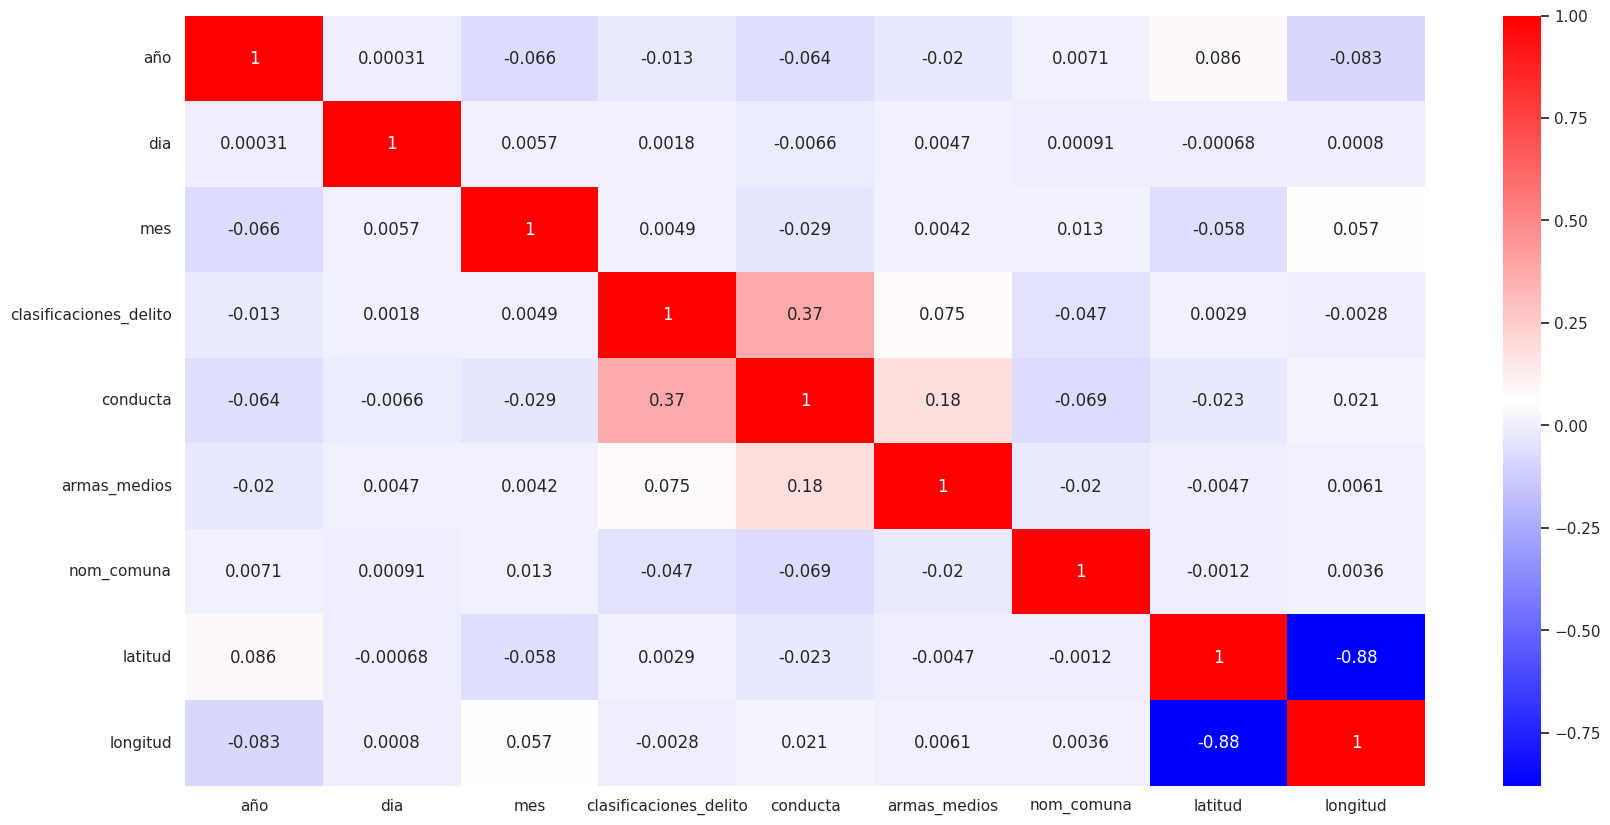

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dfCo.corr(), annot=True, cmap = 'bwr')
plt.show()



> **Correlacion**

*   Una correlación de 0.37 entre **clasificacion de delito** y **conducta** indica una relación moderada entre los dos datos en la matriz de correlación. Sin embargo, es importante tener en cuenta que la correlación no implica causalidad, es decir, que no necesariamente hay una relación de causa y efecto entre los dos datos.

*   Una correlación de 0.17 entre **conducta** y **armas medio** indica una relación débil entre los dos datos en la matriz de correlación. Al igual que en el caso anterior, es importante tener en cuenta que la correlación no implica causalidad, es decir, que no necesariamente hay una relación de causa y efecto entre los dos datos.


*   Una correlación de -0.88 entre **latitud** y **longitud** indica una fuerte relación inversa entre los dos datos en la matriz de correlación. Esto significa que cuando un dato aumenta, el otro disminuye y viceversa, y esta relación es significativa y fuerte.











In [ ]:
df6['año'] = pd.to_numeric(df6['año'], errors='coerce')
df6['cantidad'] = pd.to_numeric(df6['cantidad'], errors='coerce')

In [ ]:
df6.dtypes


año            int64
Festividad    object
nom_comuna    object
conducta      object
cantidad       int64
dtype: object

In [ ]:
#Definir un diccionario de mapeo
delitos = {
    'HURTO A PERSONAS': 1,
    'LESIONES PERSONALES': 2,
    'LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )': 3,
    'VIOLENCIA INTRAFAMILIAR': 4,
    'HURTO A ENTIDADES COMERCIALES': 5,
    'HURTO A RESIDENCIAS': 6,
    'HURTO A MOTOCICLETAS': 7,
    'HOMICIDIO': 8,
    'HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)': 9,
    'EXTORSIÓN': 10,
    'HURTO A AUTOMOTORES': 11,
    'FEMINICIDIO': 12,
    'LESIONES CULPOSAS': 13,
    'HURTO A ENTIDADES FINANCIERAS': 14,
    'HURTO A PIRATERÍA TERRESTRE': 15,
    'LESIONES AL FETO': 16,
    'HURTO A ABIGEATO': 17,
    'SECUESTRO SIMPLE': 18,
    'LESIONES PERSONALES ( CIRCUNSTANCIAS DE AGRAVACIÓN)': 19,
    'SECUESTRO EXTORSIVO': 20,
    'INCAPACIDAD PARA TRABAJAR O ENFERMEDAD': 21
}

#Aplicar el mapeo a la columna 'delitos'
df6['conducta'] = df6['conducta'].map(delitos)

#Definir un diccionario de mapeo
Comuna = {
    'Norte': 1,
    'Nor Oriental': 2,
    'San Francisco': 3,
    'Occidental': 4,
    'García Rovira': 5,
    'La Concordia': 6,
    'La Ciudadela': 7,
    'Sur Occidente': 8,
    'La Pedregosa': 9,
    'Provenza': 10,
    'Sur': 11,
    'Cabecera del Llano': 12,
    'Oriental': 13,
    'Morrorico': 14,
    'Centro': 15,
    'Lagos del Cacique': 16,
    'Mutis': 17
}

#Aplicar el mapeo a la columna 'Comuna'
df6['nom_comuna'] = df6['nom_comuna'].map(Comuna)
#Definir un diccionario de mapeo

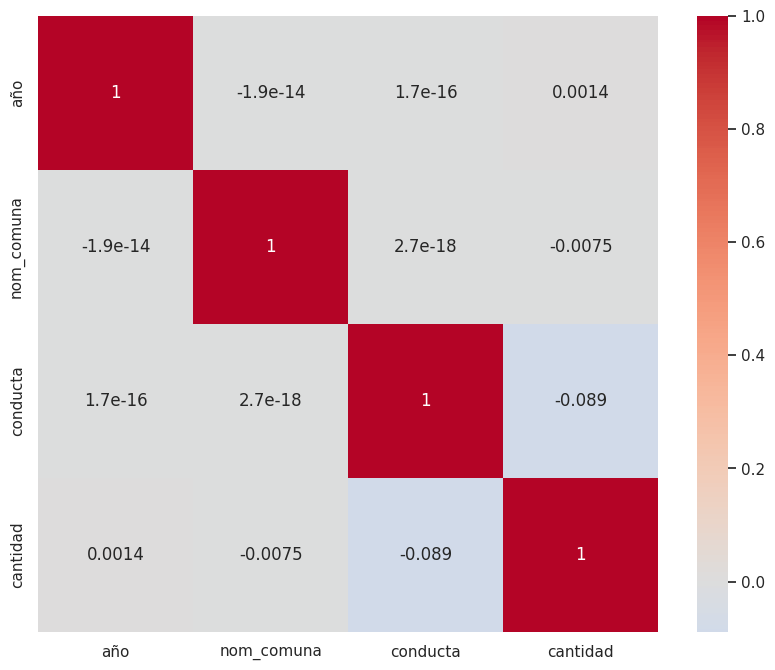

In [ ]:
#Seleccionar las columnas numéricas para la matriz de correlación
columnas_numericas = df6.select_dtypes(include=[np.number])

#Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

#Crear una figura y un eje para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)

#Mostrar la figura
plt.show()

##Comparaciones Estadisticas

<ipython-input-50-064190e588e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


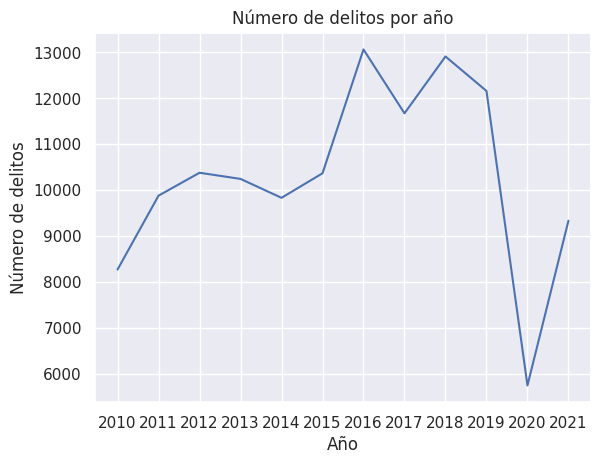

In [ ]:
# Crear un filtro para datos de 2021 o anterior
filtro_año = df1['año'] <= 2021
df_filtrado = df1[filtro_año]

# Separar el año en una columna separada
df_filtrado['año_separado'] = df_filtrado['año'].astype(str).str[:4]

# Agrupar los datos por año y contar el número de delitos en cada año
delitos_por_año = df_filtrado.groupby('año_separado')['clasificaciones_delito'].count()

# Crear el gráfico de línea de tiempo
plt.plot(delitos_por_año.index, delitos_por_año.values)

# Agregar etiquetas al gráfico
plt.title('Número de delitos por año')
plt.xlabel('Año')
plt.ylabel('Número de delitos')

# Mostrar el gráfico
plt.show()


> **Distribucion de los delitos a lo largo de los años**

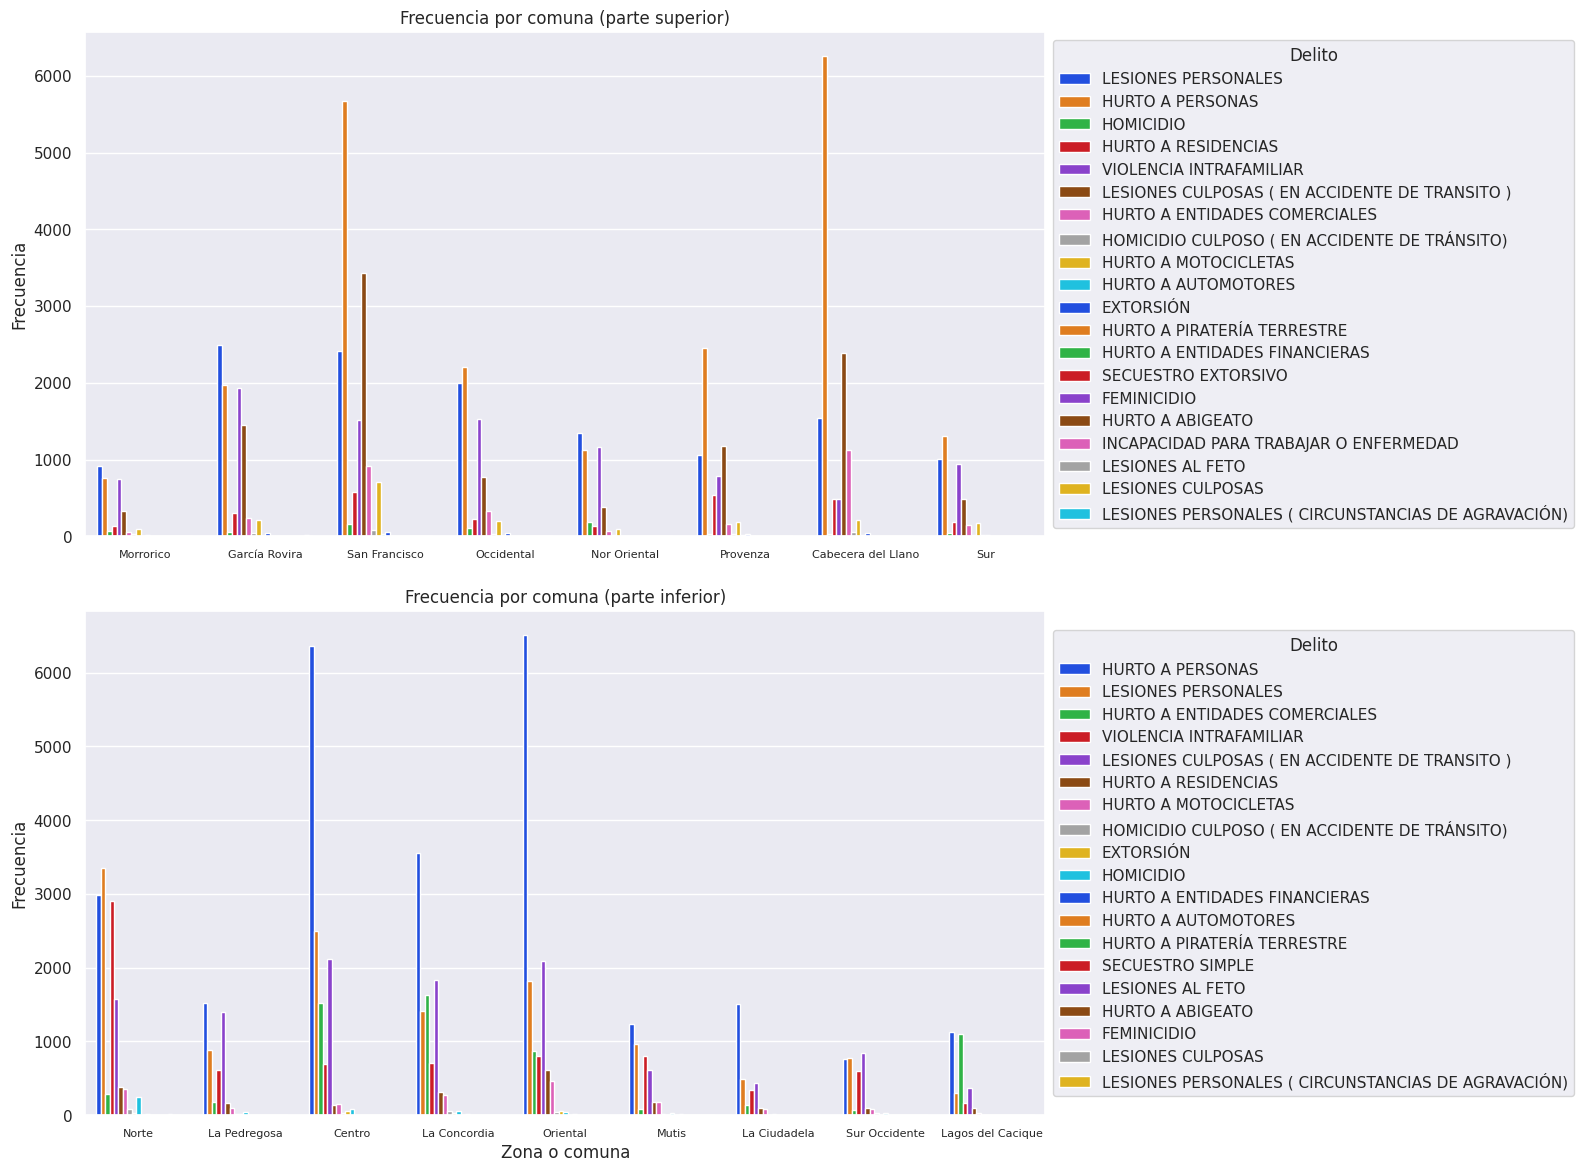

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir las comunas en dos grupos
num_comunas = len(df_combine["nom_comuna"].unique())
half_num_comunas = num_comunas // 2
comunas_top = df_combine["nom_comuna"].unique()[:half_num_comunas]
comunas_bottom = df_combine["nom_comuna"].unique()[half_num_comunas:]

# Crear los subplots
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

# Graficar la mitad de arriba
sns.countplot(x="nom_comuna", hue="conducta", data=df_combine[df_combine["nom_comuna"].isin(comunas_top)], ax=ax_top, palette="bright")
ax_top.set_title("Frecuencia por comuna (parte superior)")
ax_top.set_xlabel("")
ax_top.set_ylabel("Frecuencia")
ax_top.legend(title="Delito", loc="center left", bbox_to_anchor=(1, 0.5))
ax_top.set_xticklabels(comunas_top, fontsize=8)

# Graficar la mitad de abajo
sns.countplot(x="nom_comuna", hue="conducta", data=df_combine[df_combine["nom_comuna"].isin(comunas_bottom)], ax=ax_bottom, palette="bright")
ax_bottom.set_title("Frecuencia por comuna (parte inferior)")
ax_bottom.set_xlabel("Zona o comuna")
ax_bottom.set_ylabel("Frecuencia")
ax_bottom.legend(title="Delito", loc="center left", bbox_to_anchor=(1, 0.5))
ax_bottom.set_xticklabels(comunas_bottom, fontsize=8)

plt.tight_layout()
plt.show()




> **Delitos Por Comuna**

*    La gráfica  muestra los patrones o tendencias en la incidencia delictiva en cada comuna a lo largo del tiempo
*    Se puede comparar las comunaspara identificar las áreas donde la incidencia delictiva es más alta o baja







<Axes: xlabel='año', ylabel='nom_comuna'>

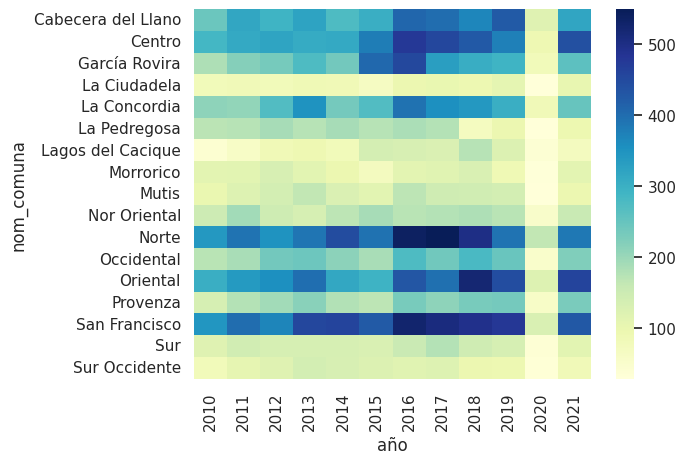

In [ ]:
import seaborn as sns

#Esto creará un nuevo dataframe llamado df_filtered que solo contiene las columnas "nom_comuna", "año" y "conducta" para las filas donde "Festividad" no tiene el valor "No Aplica".
df_filtered = df_combine.loc[df_combine['Festividad'] != 'No Aplica', ['nom_comuna', 'año', 'conducta']]

# crear tabla pivote
tabla_pivote = df_filtered.pivot_table(index='nom_comuna', columns='año', values='conducta', aggfunc='count')

# crear mapa Heatmap
sns.heatmap(tabla_pivote, cmap='YlGnBu')



> **Heatmap muestra la distribución de los tipos de delitos en cada comuna por año; se podría inferir**


*   Hay ciertas comunas que tienen una mayor incidencia de ciertos tipos de delitos a lo largo del tiempo
*   Hay ciertos años en los que se registran mayores niveles de ciertos tipos de delitos en general o en ciertas comunas específicas.

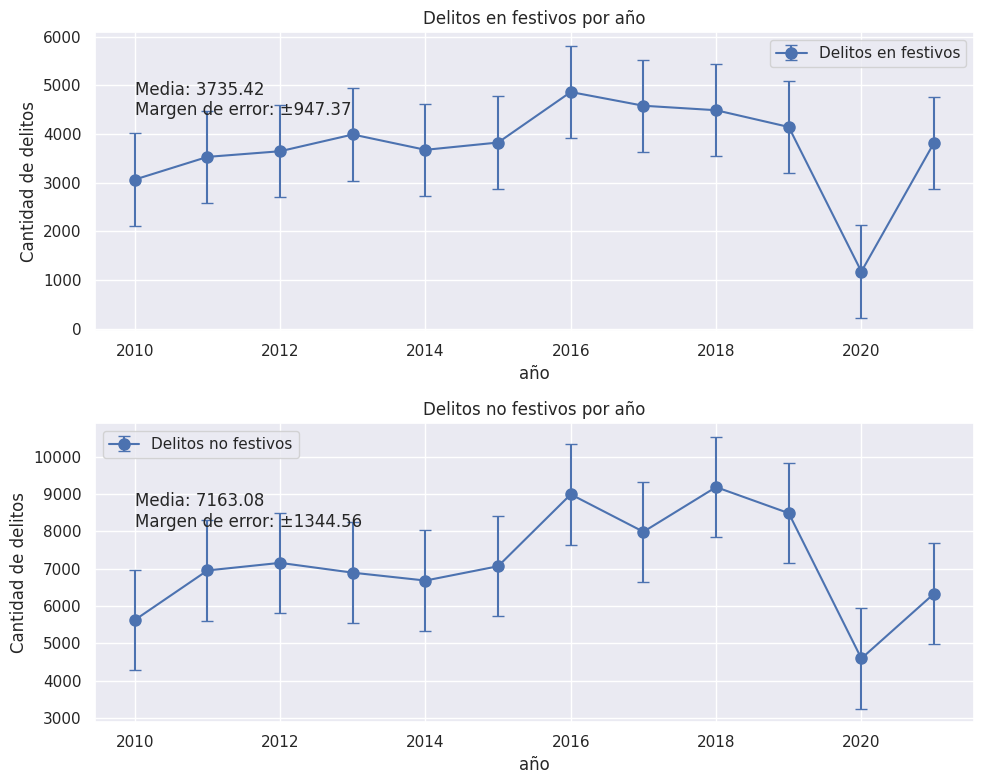

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# leer el archivo CSV
df = df_combine

# obtener una columna solo con el año
df['Año'] = pd.DatetimeIndex(df['año']).year

# separar los datos para días festivos y no festivos
df_festivos = df[df['Festividad'] != 'No Aplica']
df_no_festivos = df[df['Festividad'] == 'No Aplica']

# agrupar los datos por año y tipo de día
df_festivos_anuales = df_festivos.groupby(['año']).size().reset_index(name='conducta')
df_no_festivos_anuales = df_no_festivos.groupby(['año']).size().reset_index(name='conducta')

# crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# plot para los delitos en festivos
ax1.errorbar(df_festivos_anuales['año'], df_festivos_anuales['conducta'], yerr=df_festivos_anuales['conducta'].std(), label='Delitos en festivos', capsize=4, fmt='o-', markersize=8)

# agregar cuadro con la media y margen de error para delitos en festivos
media_festivos = df_festivos_anuales['conducta'].mean()
desviacion_festivos = df_festivos_anuales['conducta'].std()
ax1.text(df_festivos_anuales['año'].iloc[0], media_festivos + desviacion_festivos + 20, f"Media: {media_festivos:.2f}\nMargen de error: ±{desviacion_festivos:.2f}", ha='left', va='center')

# plot para los delitos no festivos
ax2.errorbar(df_no_festivos_anuales['año'], df_no_festivos_anuales['conducta'], yerr=df_no_festivos_anuales['conducta'].std(), label='Delitos no festivos', capsize=4, fmt='o-', markersize=8)

# agregar cuadro con la media y margen de error para delitos no festivos
media_no_festivos = df_no_festivos_anuales['conducta'].mean()
desviacion_no_festivos = df_no_festivos_anuales['conducta'].std()
ax2.text(df_no_festivos_anuales['año'].iloc[0], media_no_festivos + desviacion_no_festivos + 20, f"Media: {media_no_festivos:.2f}\nMargen de error: ±{desviacion_no_festivos:.2f}", ha='left', va='center')

# establecer las etiquetas del eje x e y y el título de cada subplot
ax1.set_xlabel('año')
ax1.set_ylabel('Cantidad de delitos')
ax1.set_title('Delitos en festivos por año')

ax2.set_xlabel('año')
ax2.set_ylabel('Cantidad de delitos')
ax2.set_title('Delitos no festivos por año')

# agregar una leyenda a cada subplot
ax1.legend()
ax2.legend()

# ajustar los subplots para evitar solapamiento
fig.tight_layout()

# mostrar el gráfico
plt.show()




> **Delitos En Festivos**

*   la cantidad de delitos por año varía significativamente
*   El margen de error indica que la media puede estar dentro de un rango de +/- 947, lo que significa que la cantidad de delitos por año puede oscilar entre 2788 y 4682.
*   Es importante tener en cuenta que la variabilidad en la cantidad de delitos por año puede estar influenciada por diferentes factores, como la época del año, la situación económica, el nivel de seguridad, entre otros
*    Es importante considerar estos factores al analizar la tendencia de los delitos en una región determinada


> **Delitos En No Festivos**

*   El promedio de delitos por año es de 7163.
*   El margen de error de 1354 indica que podemos estar 95% seguros de que el verdadero valor de delitos por año está entre 5819 y 8507
*   Como el margen de error es relativamente grande en comparación con el promedio, esto sugiere que hay una variabilidad significativa en el número de delitos por año y que los valores individuales pueden variar ampliamente.
*   Es importante tener en cuenta que esta inferencia se basa en una muestra de datos y puede no ser representativa de toda la población de delitos









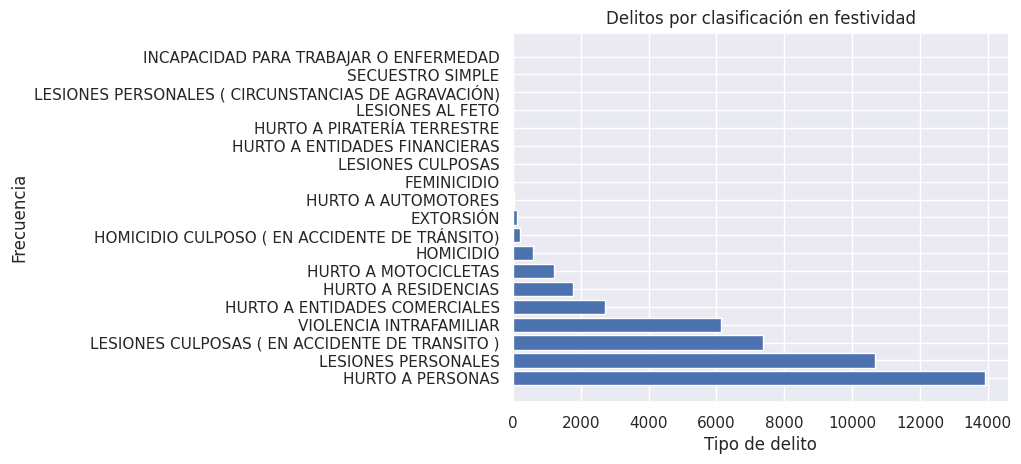

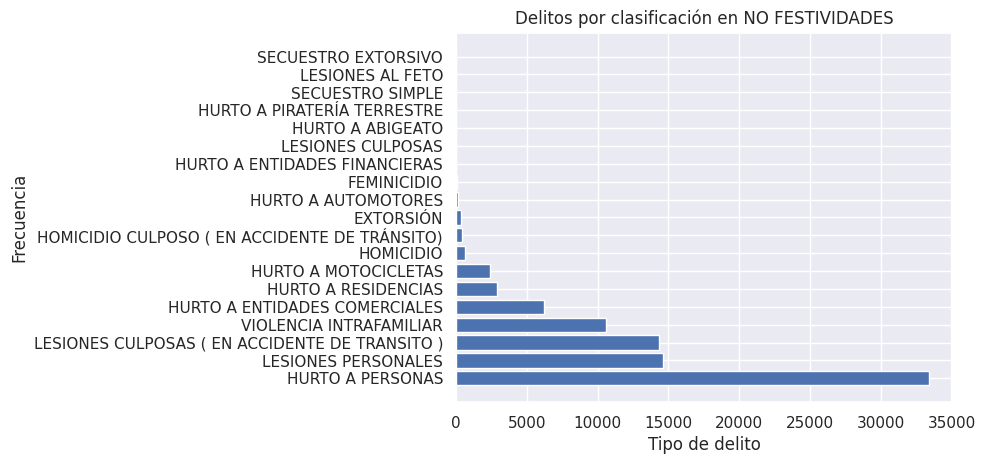

In [ ]:
# Filtrar los datos solo por Festividades
df_festividades = df_combine.loc[df_combine['Festividad'] != 'No Aplica']

# Contar la frecuencia de cada tipo de delito
delito_counts = df_festividades['conducta'].value_counts()

# Crear el gráfico de barras
plt.barh (delito_counts.index, delito_counts.values)

# Ajustar la orientación de las etiquetas en el eje x
plt.xticks(rotation=0)

# Añadir etiquetas y título
plt.xlabel('Tipo de delito')
plt.ylabel('Frecuencia')
plt.title('Delitos por clasificación en festividad')

# Mostrar el gráfico
plt.show()

# Filtrar los datos solo por Festividades
df_nofesti = df_combine.loc[df_combine['Festividad'] == 'No Aplica']

# Contar la frecuencia de cada tipo de delito
delito_counts_nofesti = df_nofesti['conducta'].value_counts()

# Crear el gráfico de barras
plt.barh(delito_counts_nofesti.index, delito_counts_nofesti.values)

# Ajustar la orientación de las etiquetas en el eje x
plt.xticks(rotation=0)

# Añadir etiquetas y título
plt.xlabel('Tipo de delito')
plt.ylabel('Frecuencia')
plt.title('Delitos por clasificación en NO FESTIVIDADES')

# Mostrar el gráfico
plt.show()



> **Delitos Cruzados**

*   Se denota delitos predominantes para los dias festivos y no festivos en igualdad de orden; se puede inferir que la presencia de festividades no afecta significativamente el número de delitos cometidos en en las comunas. Esto podría deberse a que la presencia de festividades no necesariamente afecta la situación de seguridad en una comuna y no modifica la tasa de criminalidad en esa área.
*   Es importante tener en cuenta que esta es solo una inferencia general y que podría variar según la ubicación y el contexto específico de cada comunidad.



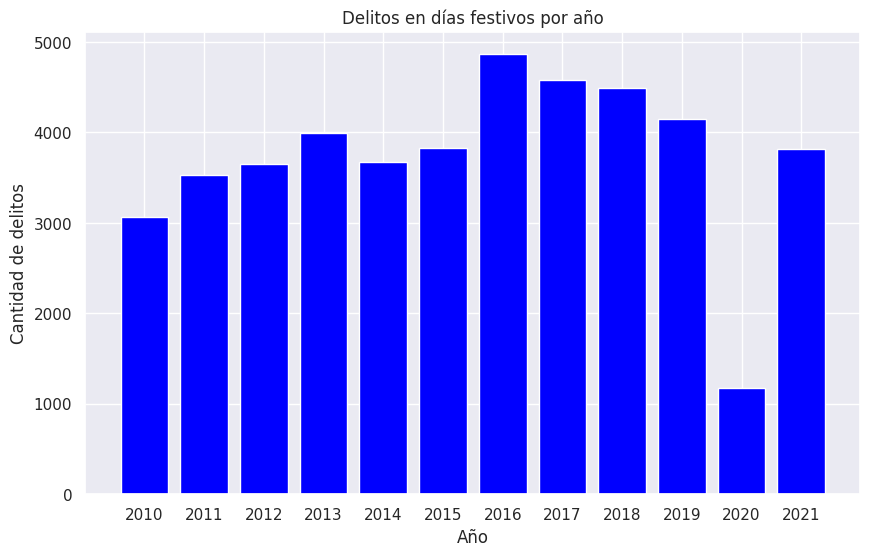

In [ ]:
# Filtrar solo los días festivos
df_festivos = df_combine[df_combine['Festividad'] != 'No Aplica']

# Crear una lista de los años
anios = df_festivos['año'].unique()

# Agrupar los datos por año y contar la cantidad de delitos
delitos_por_anio = df_festivos.groupby('año').size().reset_index(name='counts')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras
ax.bar(delitos_por_anio['año'], delitos_por_anio['counts'], color='blue')

# Establecer las etiquetas del eje x y el título del gráfico
ax.set_xticks(anios)
ax.set_xticklabels(anios)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de delitos')
ax.set_title('Delitos en días festivos por año')

# Mostrar el gráfico
plt.show()





> **Incidencia De Delitos en dias festivos por año**

*   Identificacion del año con mas delitos en dias festivos






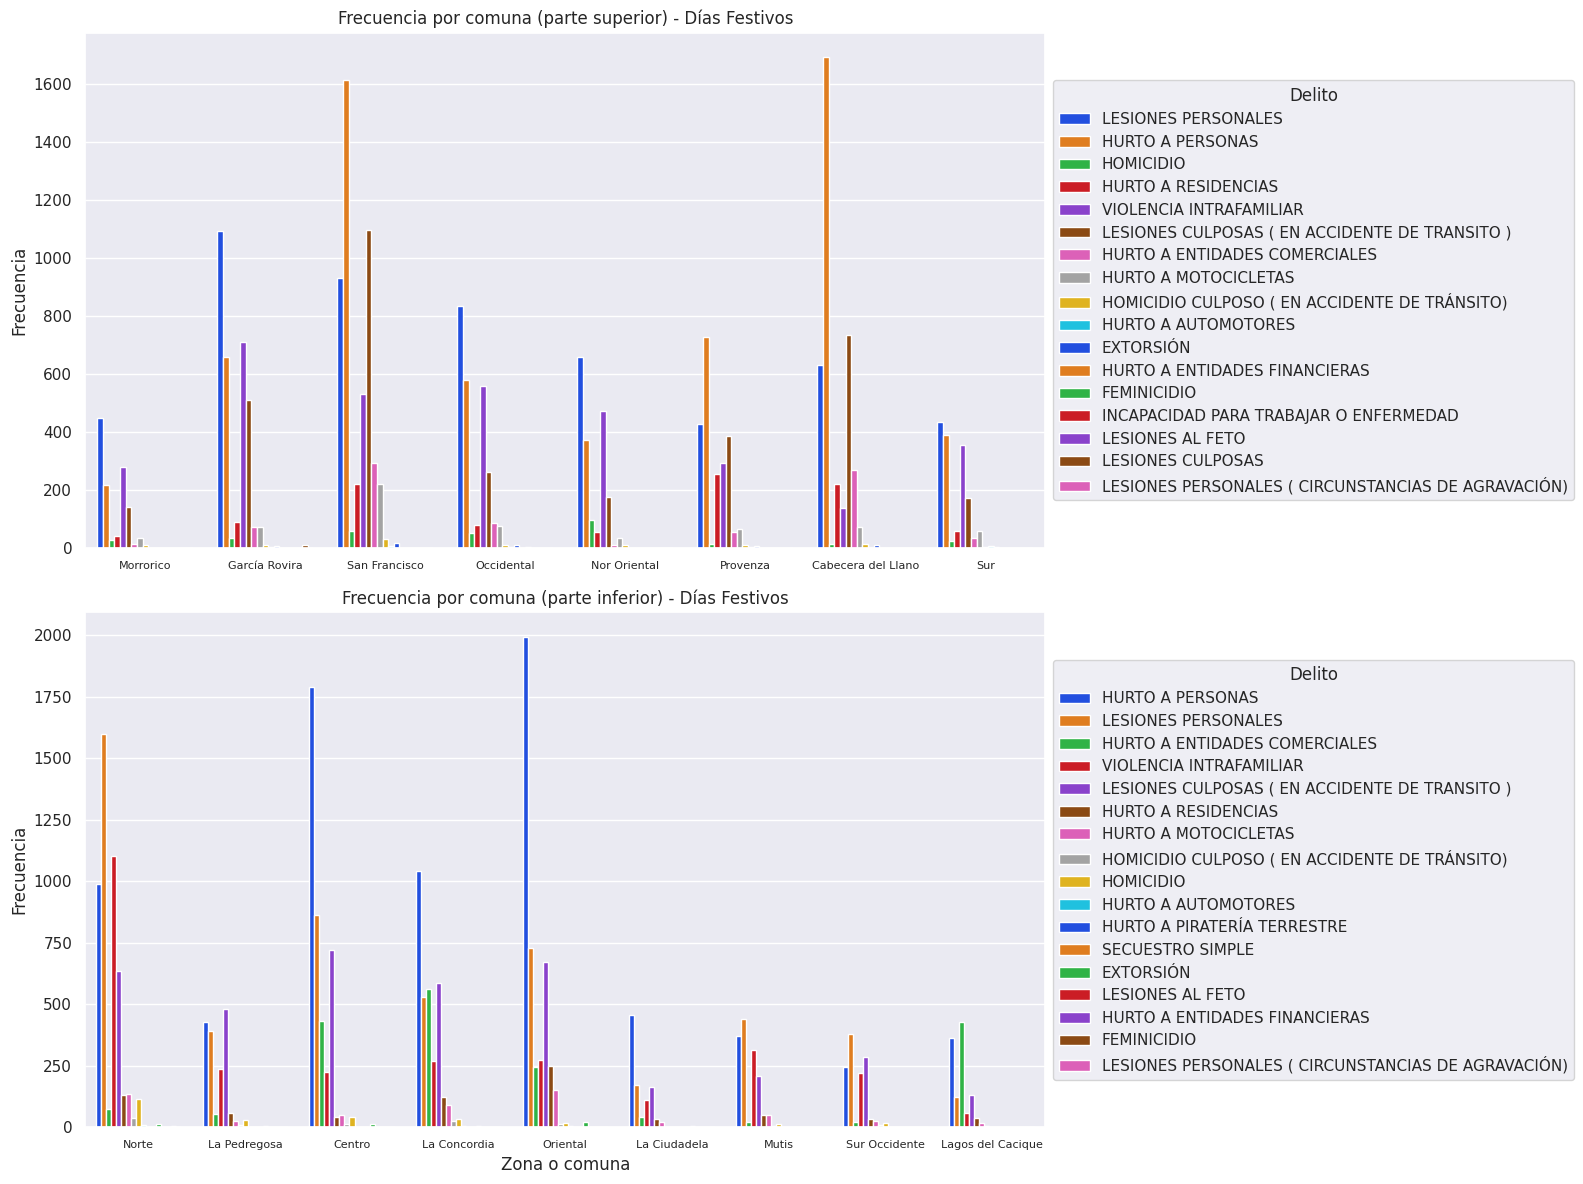

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los días festivos
df_festivos = df_combine[df_combine["Festividad"] != "No Aplica"]

# Dividir las comunas en dos grupos
num_comunas = len(df_festivos["nom_comuna"].unique())
half_num_comunas = num_comunas // 2
comunas_top = df_festivos["nom_comuna"].unique()[:half_num_comunas]
comunas_bottom = df_festivos["nom_comuna"].unique()[half_num_comunas:]

# Crear los subplots
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

# Graficar la mitad de arriba
sns.countplot(x="nom_comuna", hue="conducta", data=df_festivos[df_festivos["nom_comuna"].isin(comunas_top)], ax=ax_top, palette="bright")
ax_top.set_title("Frecuencia por comuna (parte superior) - Días Festivos")
ax_top.set_xlabel("")
ax_top.set_ylabel("Frecuencia")
ax_top.legend(title="Delito", loc="center left", bbox_to_anchor=(1, 0.5))
ax_top.set_xticklabels(comunas_top, fontsize=8)

# Graficar la mitad de abajo
sns.countplot(x="nom_comuna", hue="conducta", data=df_festivos[df_festivos["nom_comuna"].isin(comunas_bottom)], ax=ax_bottom, palette="bright")
ax_bottom.set_title("Frecuencia por comuna (parte inferior) - Días Festivos")
ax_bottom.set_xlabel("Zona o comuna")
ax_bottom.set_ylabel("Frecuencia")
ax_bottom.legend(title="Delito", loc="center left", bbox_to_anchor=(1, 0.5))
ax_bottom.set_xticklabels(comunas_bottom, fontsize=8)

plt.tight_layout()
plt.show()




> **Delitos Por Comuna En Dias Festivos**


*   La gráfica  muestra los patrones o tendencias en la incidencia delictiva en cada comuna a lo largo del tiempo
*    Se puede comparar las comunaspara identificar las áreas donde la incidencia delictiva es más alta o baja


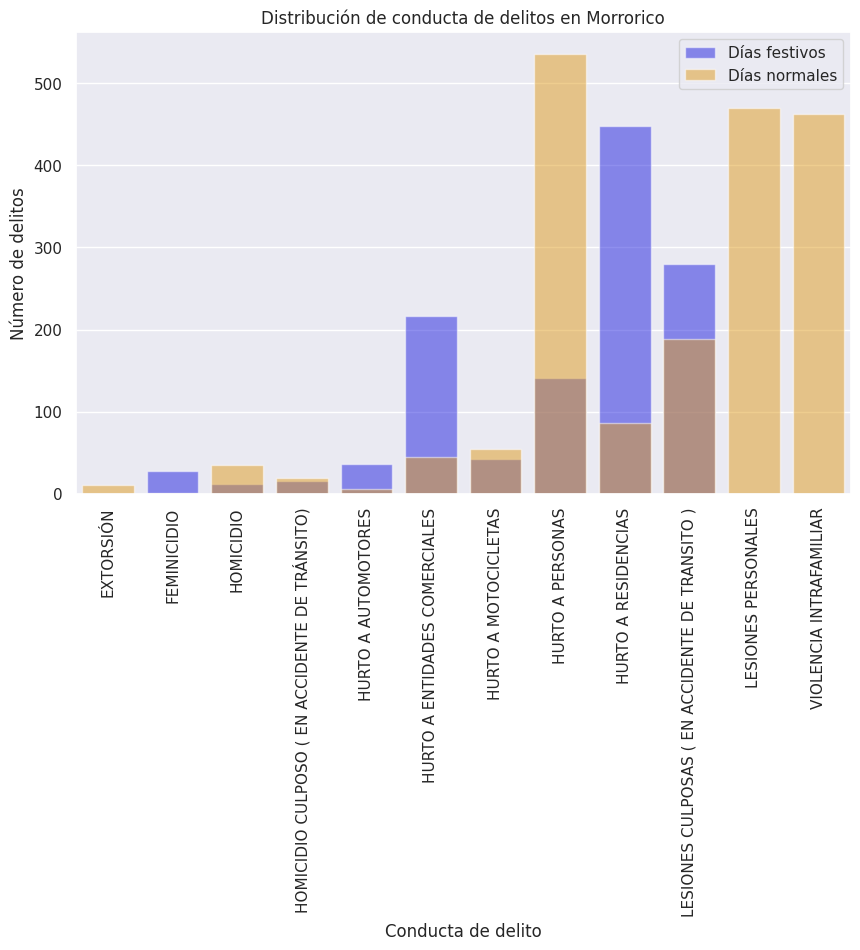

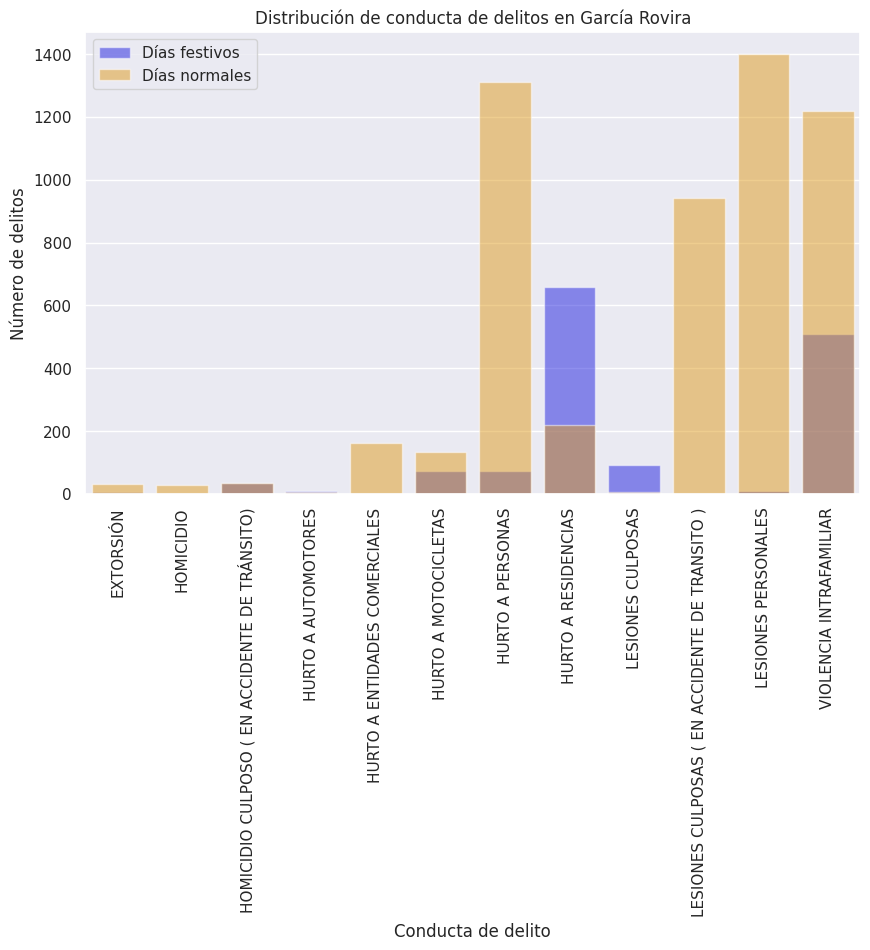

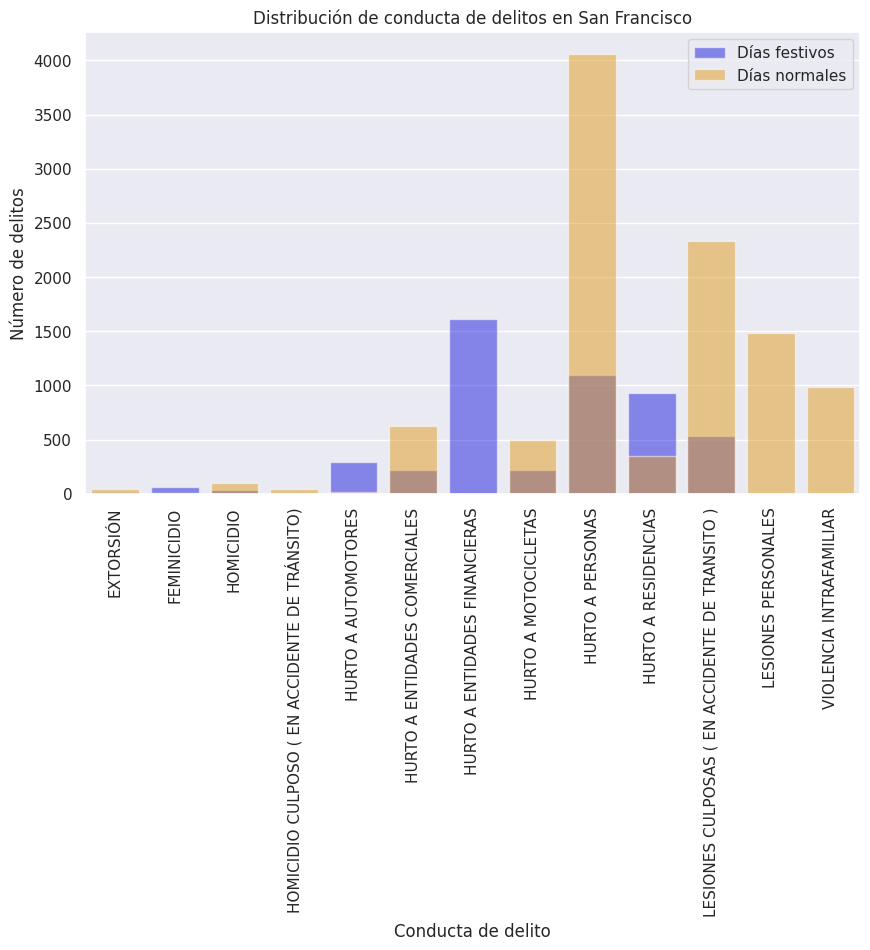

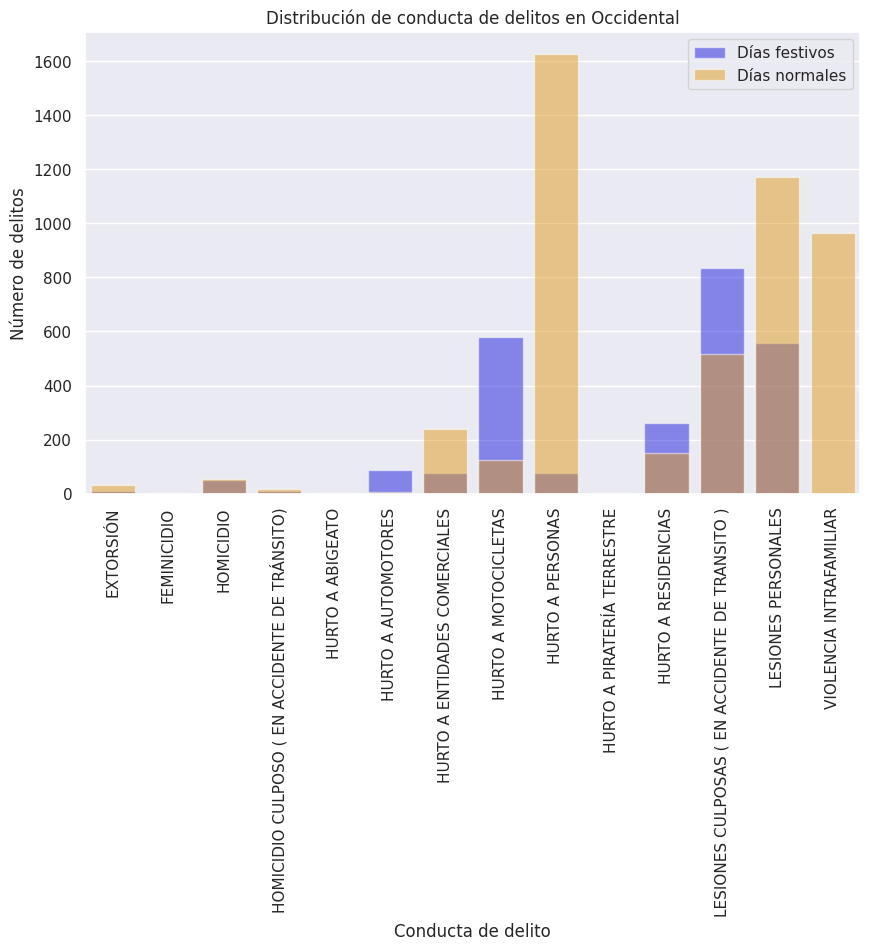

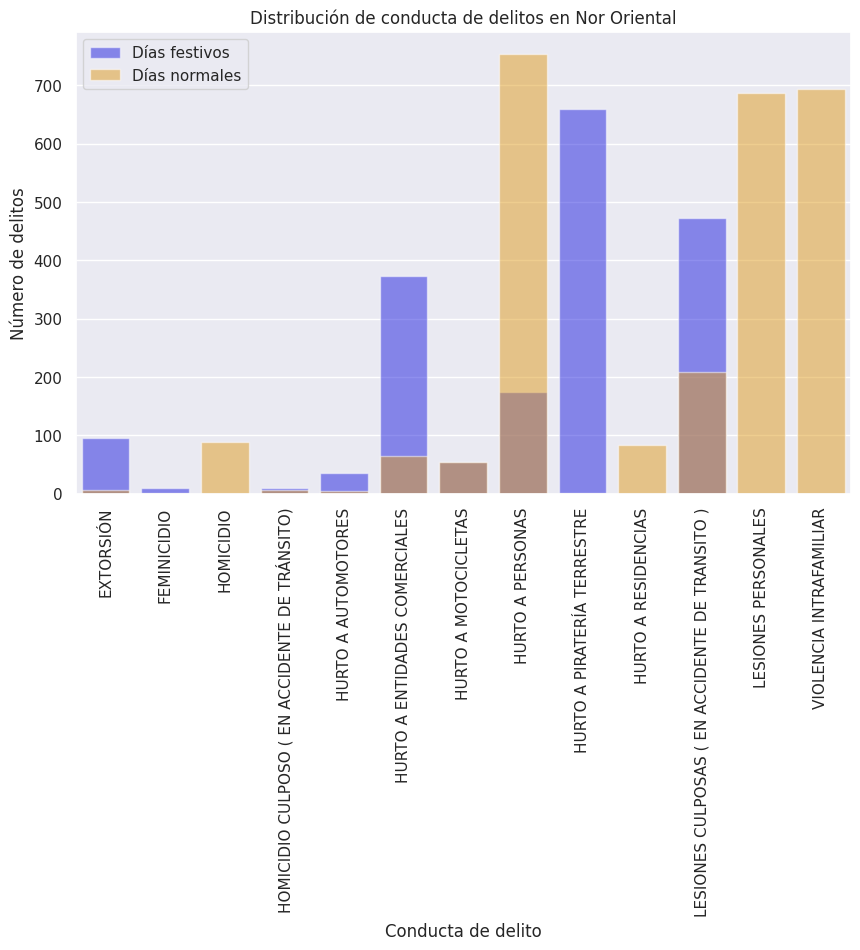

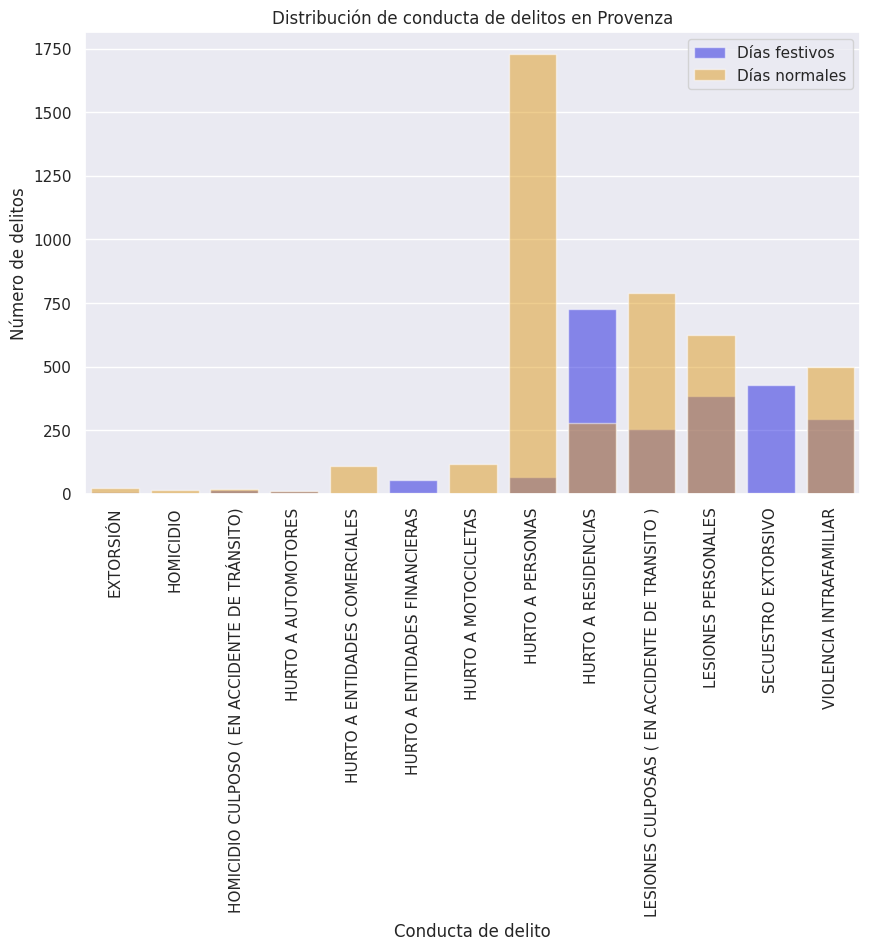

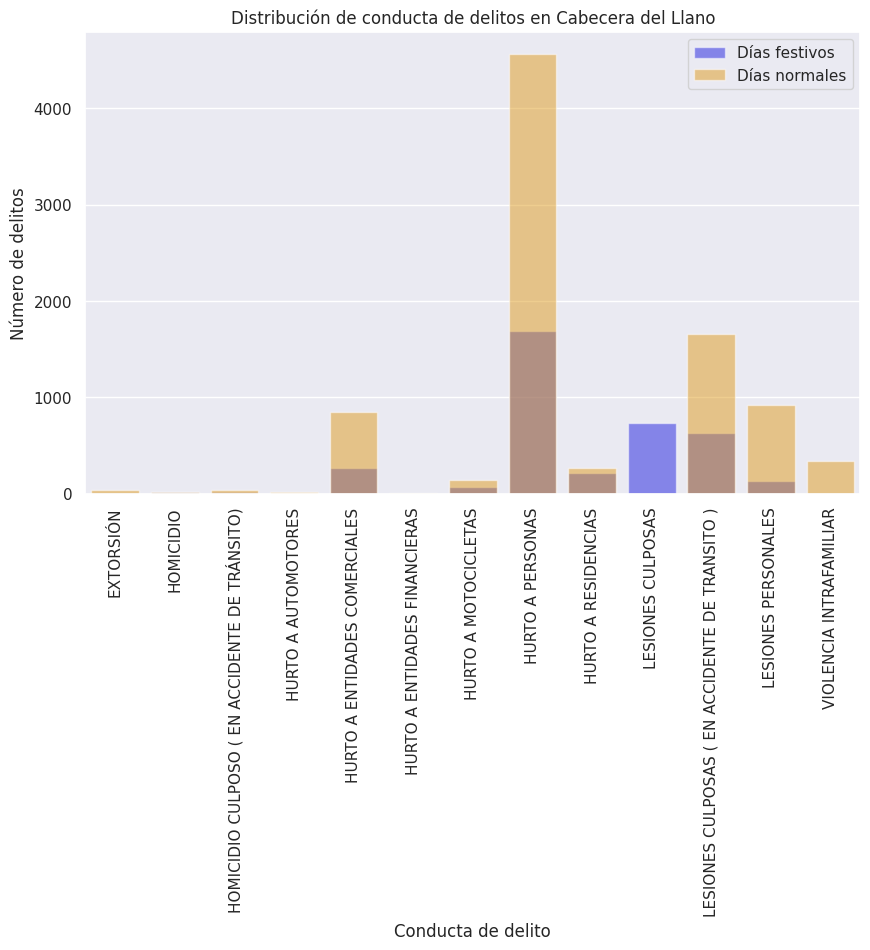

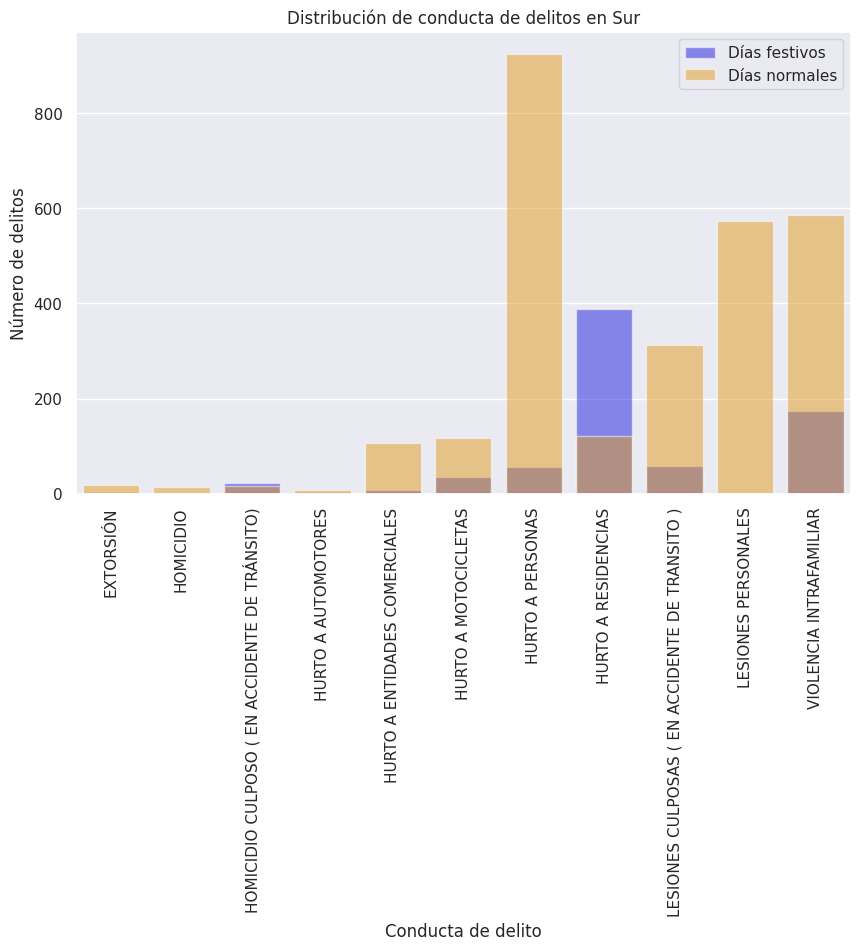

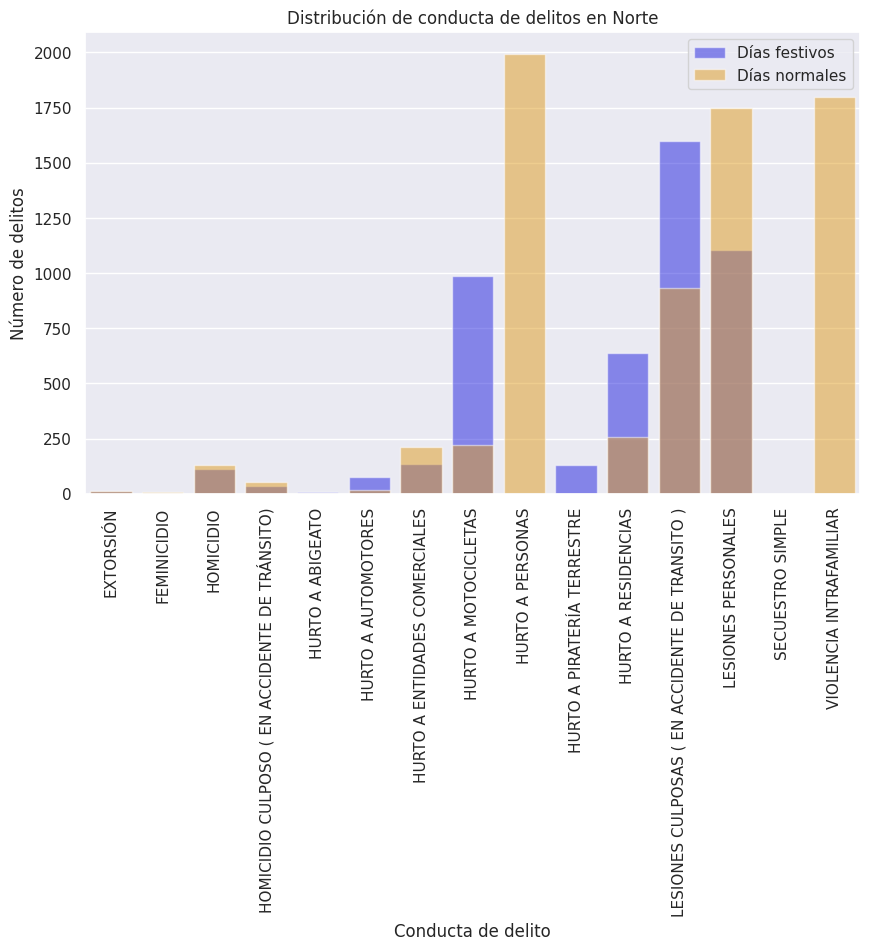

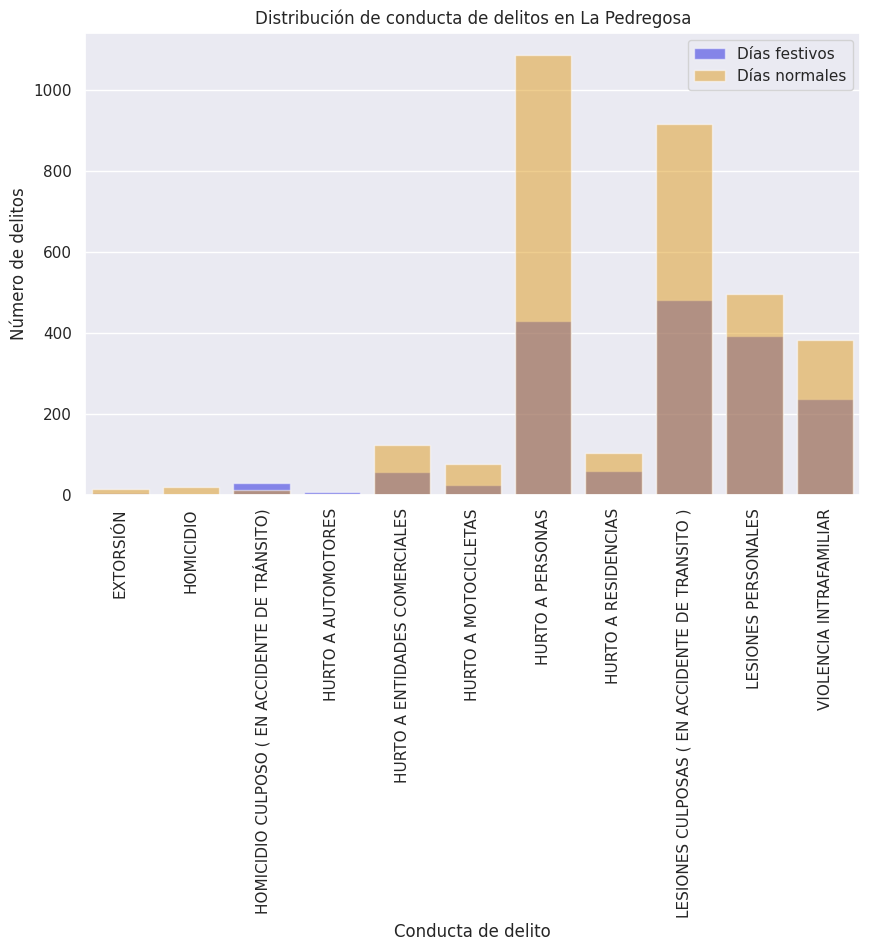

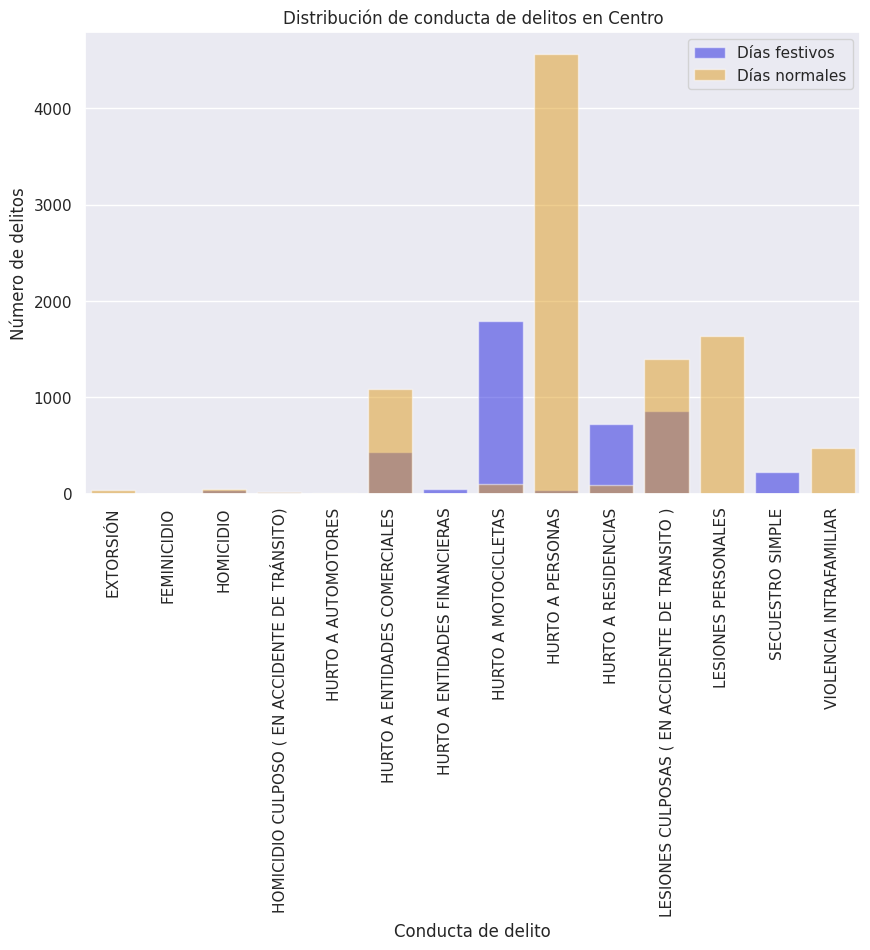

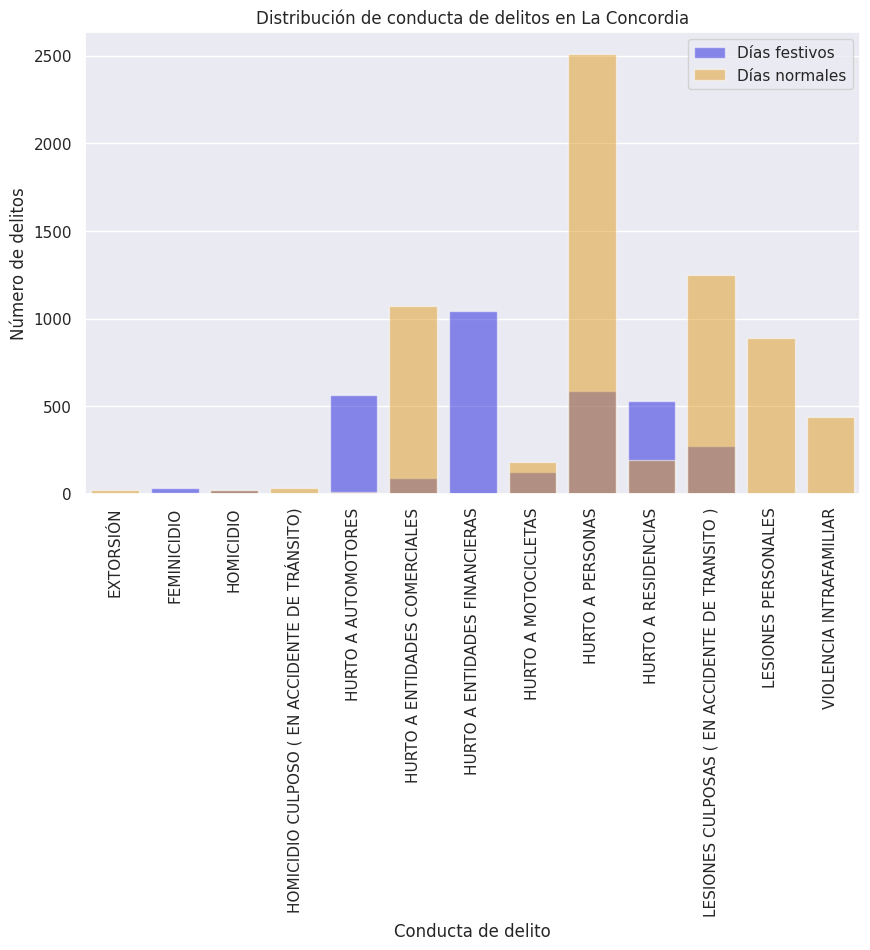

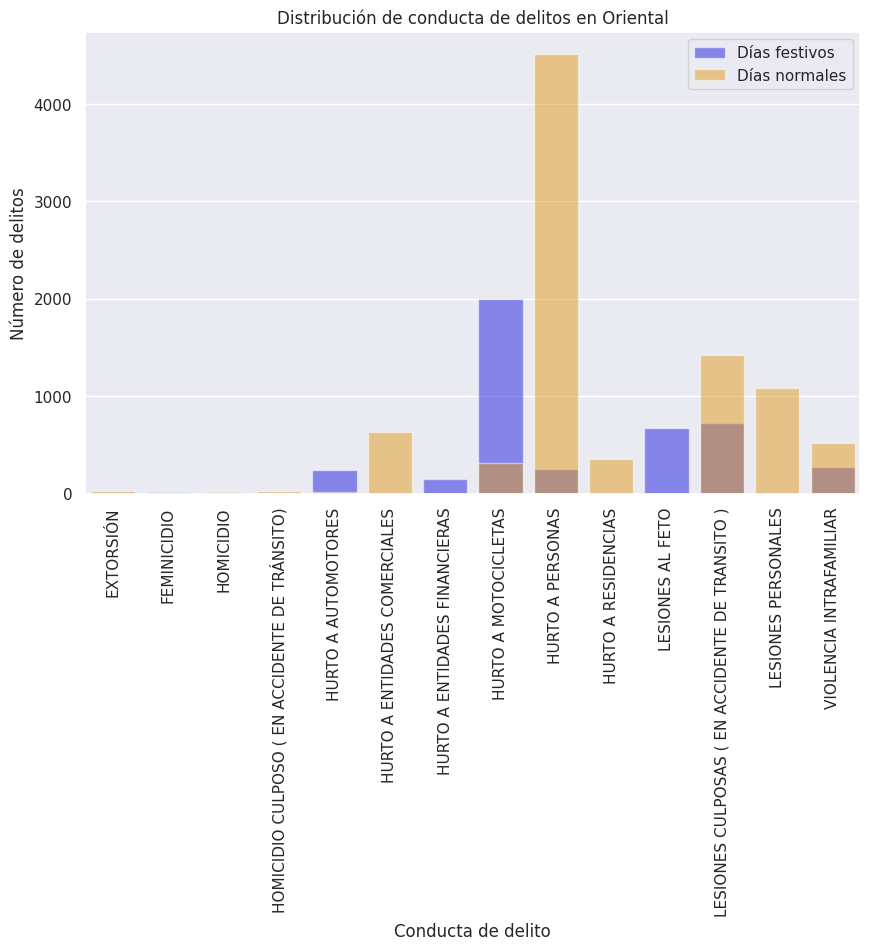

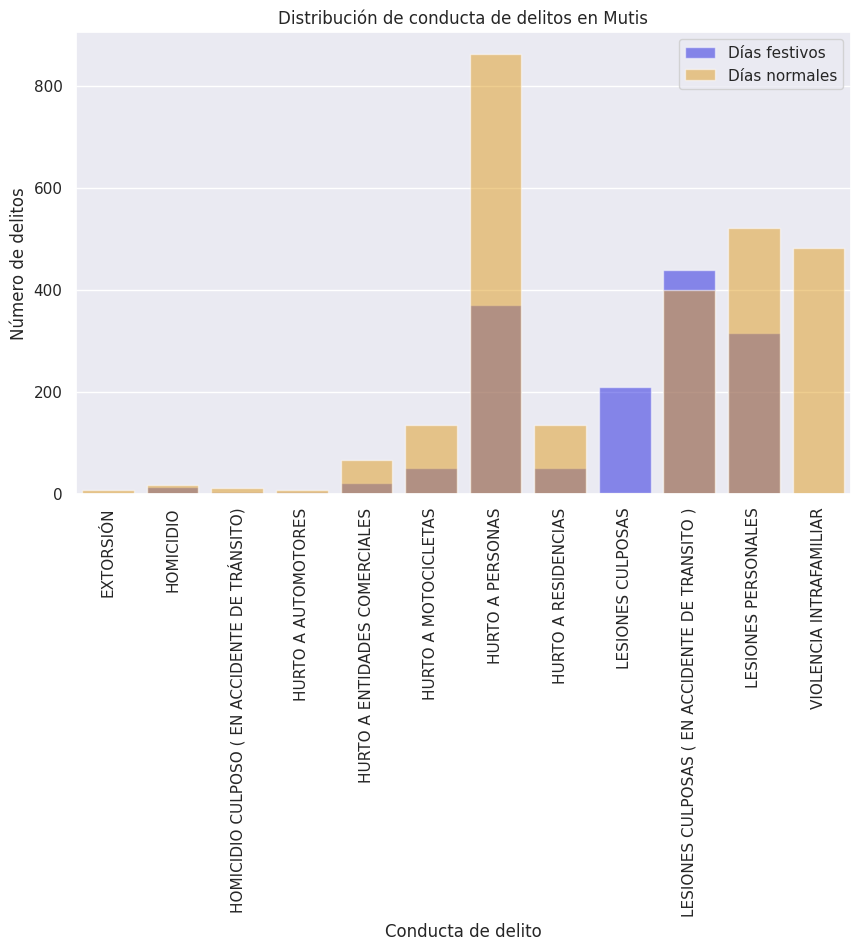

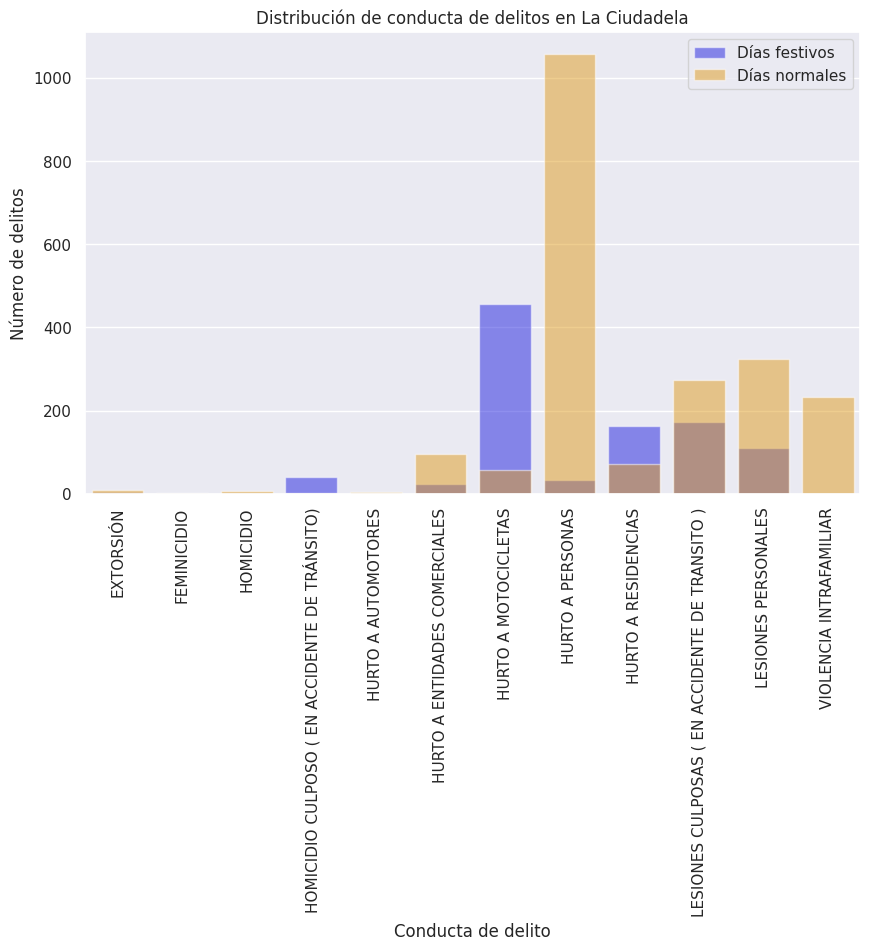

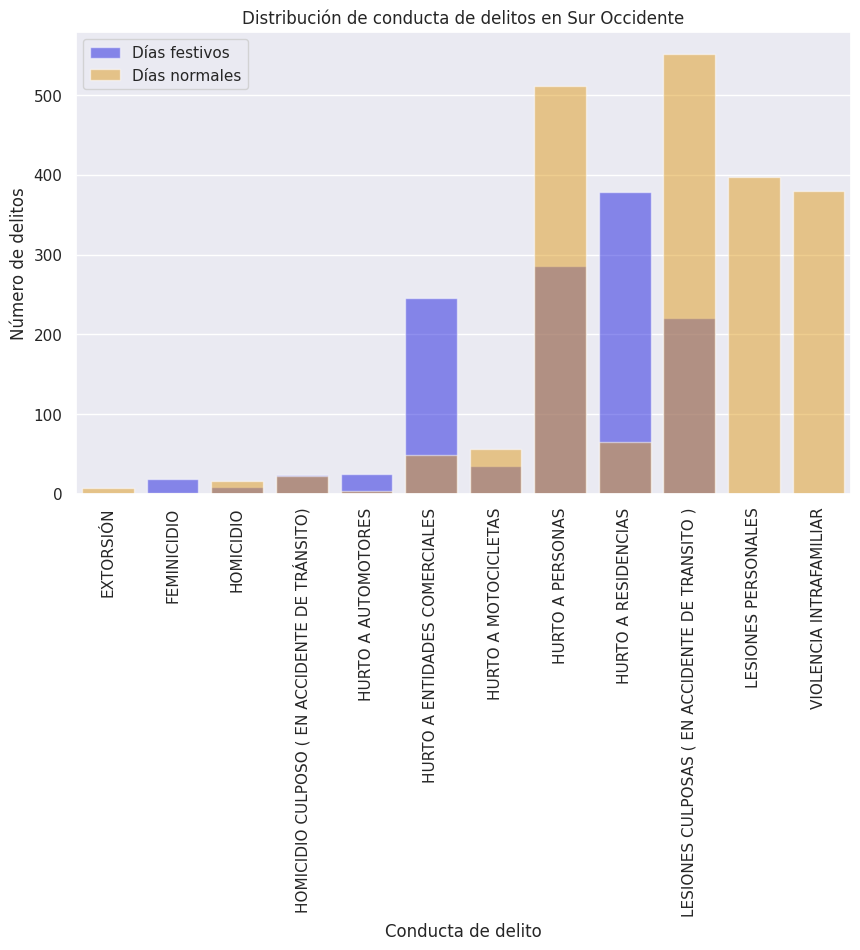

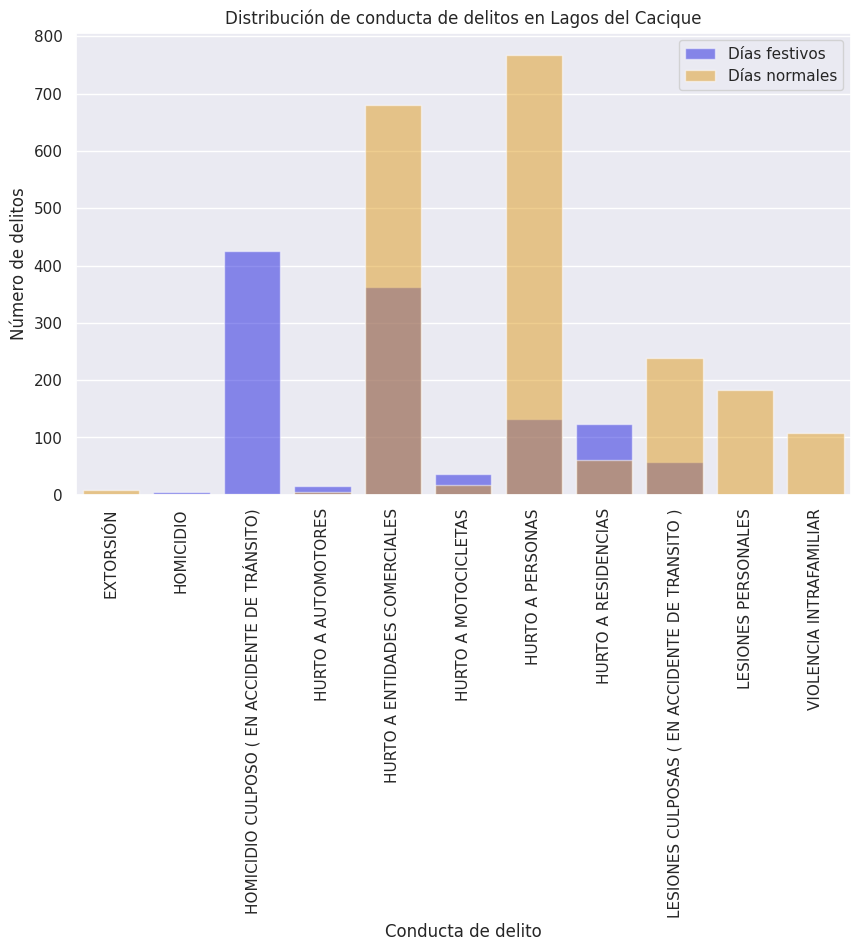

In [ ]:
# Crear un dataframe con el número de delitos por comuna (separando los festivos y no festivos)
df_delitos_festivos = df_combine[df_combine['Festividad'] != 'No Aplica'].groupby(['nom_comuna', 'conducta']).size().reset_index(name='counts')
df_delitos_normales = df_combine[df_combine['Festividad'] == 'No Aplica'].groupby(['nom_comuna', 'conducta']).size().reset_index(name='counts')

# Agregar un gráfico de barras agrupadas para la distribución de conducta de delitos en cada comuna
comunas = df_combine['nom_comuna'].unique()
for comuna in comunas:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_comuna_festivos = df_delitos_festivos[df_delitos_festivos['nom_comuna'] == comuna]
    df_comuna_normales = df_delitos_normales[df_delitos_normales['nom_comuna'] == comuna]
    sns.barplot(x='conducta', y='counts', data=df_comuna_festivos, color='blue', alpha=0.5, label='Días festivos')
    sns.barplot(x='conducta', y='counts', data=df_comuna_normales, color='orange', alpha=0.5, label='Días normales')
    ax.set_xlabel('Conducta de delito')
    plt.xticks(rotation=90)
    ax.set_ylabel('Número de delitos')
    ax.set_title(f'Distribución de conducta de delitos en {comuna}')
    ax.legend()
    plt.show()


> **Especificacion General de las afectaciones delictivas en las comunas en los dias festivos y no festivos**




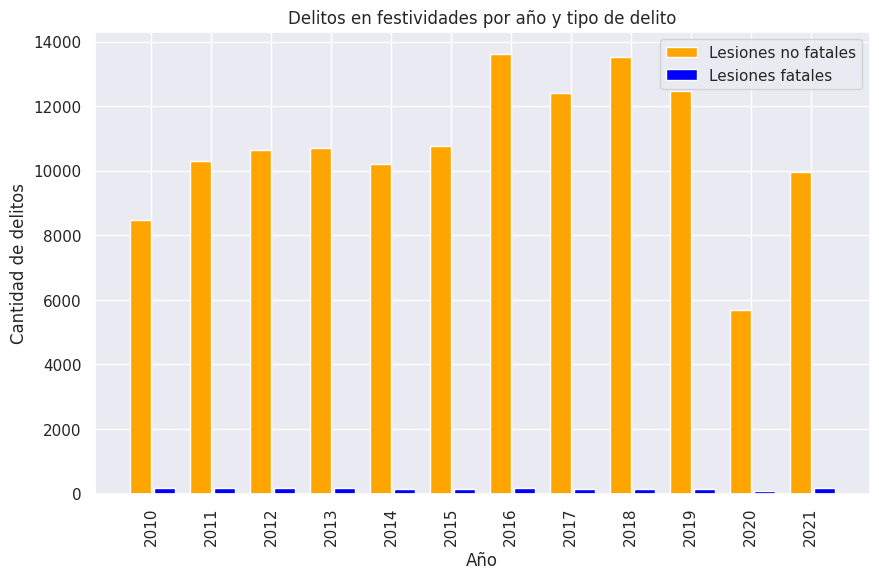

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# crear un DataFrame que agregue los delitos en festivos por año
df_festivos_anuales = df_combine.groupby(['año', 'clasificaciones_delito']).size().reset_index(name='conducta')

# crear una figura
fig, ax = plt.subplots(figsize=(10,6))

# definir el ancho de las barras y la separación entre las columnas
bar_width = 0.35
spacing = 0.05

# separar los datos de cada tipo de delito en un DataFrame diferente
df_lesiones_no_fatales = df_festivos_anuales[df_festivos_anuales['clasificaciones_delito'] == 'Lesiones no fatales']
df_lesiones_fatales = df_festivos_anuales[df_festivos_anuales['clasificaciones_delito'] == 'Lesiones fatales']

# crear las barras para cada tipo de delito
ax.bar(df_lesiones_no_fatales['año'] - bar_width/2, df_lesiones_no_fatales['conducta'], bar_width, label='Lesiones no fatales', color='orange')
ax.bar(df_lesiones_fatales['año'] + bar_width/2 + spacing, df_lesiones_fatales['conducta'], bar_width, label='Lesiones fatales', color='blue')

# establecer las etiquetas del eje x e y y el título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de delitos')
ax.set_title('Delitos en festividades por año y tipo de delito')

# ajustar la posición de los ticks del eje x y las etiquetas de los ticks
ax.set_xticks(np.arange(df_combine['año'].min(), df_combine['año'].max()+1, 1))
ax.set_xticklabels(np.arange(df_combine['año'].min(), df_combine['año'].max()+1, 1), rotation=90)

# agregar una leyenda al gráfico
ax.legend()

# mostrar el gráfico
plt.show()




> **Delitos en dias festivos por año segun su clasificacion**




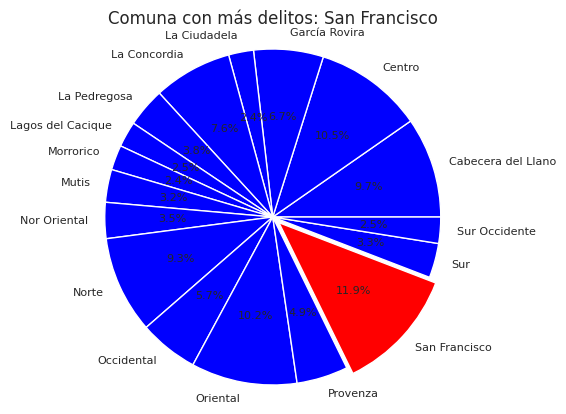

In [ ]:
# Agrupar los datos por la columna 'nom_comuna' y contar la cantidad de delitos para cada comuna
delitos_por_comuna = df_combine.groupby('nom_comuna')['conducta'].count()

# Identificar la comuna con la mayor cantidad de delitos
comuna_mas_delitos = delitos_por_comuna.idxmax()

# Crear una lista que indica cuánto debe explotar cada porción del gráfico
explode = [0.05 if comuna == comuna_mas_delitos else 0 for comuna in delitos_por_comuna.index]

# Asignar un color rojo a la comuna con mayor cantidad de delitos y azul a las demás
colores = ['blue' if comuna != comuna_mas_delitos else 'red' for comuna in delitos_por_comuna.index]

# Convertir los valores de la serie 'delitos_por_comuna' en una lista
datos = delitos_por_comuna.values.tolist()

# Establecer las propiedades de las cuñas que componen el gráfico
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

# Crear el gráfico de pastel con las opciones de estilo y forma ¿

plt.pie(datos, labels=delitos_por_comuna.index, colors=colores, autopct='%1.1f%%',
        explode=explode, textprops={'fontsize': 8}, wedgeprops=wedgeprops)
plt.axis('equal')
plt.title('Comuna con más delitos: ' + comuna_mas_delitos)

# Mostrar el gráfico
plt.show()




> **NIVEL PORCENTUAL DE DELITOS COMETIDOS EN DIAS FESTIVOS POR COMUNA**


*   De denota una diferencia considerable sobre los delitos cometidos en la comuna **San Francisco** en los dias festivos

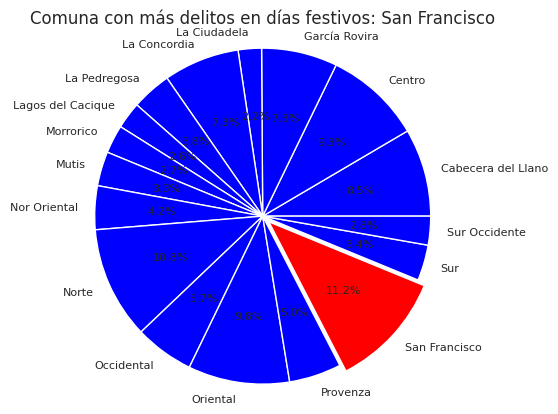

In [ ]:
# Filtrar solo los días festivos
df_festivos1 = df_combine[df_combine['Festividad'] != 'No Aplica']

# Agrupar los datos por la columna 'nom_comuna' y contar la cantidad de delitos para cada comuna en días festivos
delitos_por_comuna = df_festivos1.groupby('nom_comuna')['conducta'].count()

# Identificar la comuna con la mayor cantidad de delitos en días festivos
comuna_mas_delitos = delitos_por_comuna.idxmax()

# Crear una lista que indica cuánto debe explotar cada porción del gráfico
explode = [0.05 if comuna == comuna_mas_delitos else 0 for comuna in delitos_por_comuna.index]

# Asignar un color rojo a la comuna con mayor cantidad de delitos y azul a las demás
colores = ['blue' if comuna != comuna_mas_delitos else 'red' for comuna in delitos_por_comuna.index]

# Convertir los valores de la serie 'delitos_por_comuna' en una lista
datos = delitos_por_comuna.values.tolist()

# Establecer las propiedades de las cuñas que componen el gráfico
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

# Crear el gráfico de pastel con las opciones de estilo y forma
plt.pie(datos, labels=delitos_por_comuna.index, colors=colores, autopct='%1.1f%%',
        explode=explode, textprops={'fontsize': 8}, wedgeprops=wedgeprops)
plt.axis('equal')
plt.title('Comuna con más delitos en días festivos: ' + comuna_mas_delitos)

# Mostrar el gráfico
plt.show()


CONTUNDENTES                          37386
SIN EMPLEO DE ARMAS                   34819
ARMA BLANCA / CORTOPUNZANTE           21752
VEHICULO                              13805
ARMA DE FUEGO                          8616
MOTO                                   8206
LLAVE MAESTRA                          2547
PALANCAS                               1012
NO REPORTADO                            895
ESCOPOLAMINA                            529
PUNZANTES                               262
LLAMADA TELEFONICA                      256
CORTANTES                               127
PERRO                                    83
DIRECTA                                  63
REDES SOCIALES                           60
BICICLETA                                48
MIXTA                                    43
ACIDO                                    42
CORTOPUNZANTES                           35
QUIMICOS                                 19
GASES                                    19
ARMA TRAUMATICA                 

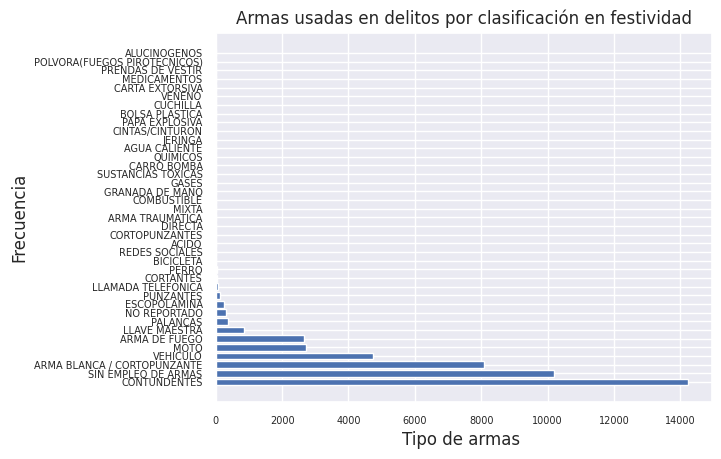

In [ ]:
# Filtrar los datos solo por Festividades
df_festividades = df_combine.loc[df_combine['Festividad'] != 'No Aplica']

# Contar la frecuencia de cada tipo de delito
delito_counts = df_festividades['armas_medios'].value_counts()

# Crear el gráfico de barras
plt.barh(delito_counts.index, delito_counts.values)

# Ajustar el tamaño de letra de los valores de las barras
plt.tick_params(axis='both', which='major', labelsize=7)


# Ajustar la orientación de las etiquetas en el eje x
plt.xticks(rotation=0)

# Añadir etiquetas y título
plt.xlabel('Tipo de armas ')
plt.ylabel('Frecuencia')
plt.title('Armas usadas en delitos por clasificación en festividad')
df_combine.armas_medios.value_counts().sort_values(ascending=False)



> **CLASIFICACION DE ARMAS USADAS EN DELITOS COMETIDOS EN DIAS FESTIVOS**

## Descargar

In [ ]:
#Descargamos el nuevo dataset
from google.colab import files

df_combine.to_csv('df_combine.csv')
files.download('df_combine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Descargamos el nuevo dataset
from google.colab import files

df8.to_csv('df8.csv')
files.download('df8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>